# Telecom Churn Prediction - Case Study

## Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, the goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

# 1. Setup like Loading dependencies & datasets

Lets start by loading our dependencies. We can keep adding any imports to this cell block, as we write mode and mode code.

In [1]:
# uncomment only if executing locally
# %pip install missingno

In [2]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os
import datetime

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# regex related
import re

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Next, we load our datasets and the data dictionary file.

The **train.csv** file contains both dependent and independent features, while the **test.csv** contains only the independent variables.

So, for model selection, I will create our own train/test dataset from the **train.csv** and use the model to predict the solution using the features in unseen test.csv data for submission.

In [3]:
#COMMENT THIS SECTION INCASE RUNNING THIS NOTEBOOK LOCALLY

#Checking the kaggle paths for the uploaded datasets
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
#INCASE RUNNING THIS LOCALLY, PASS THE RELATIVE PATH OF THE CSV FILES BELOW
#(e.g. if files are in same folder as notebook, simple write "train.csv" as path)

# data = pd.read_csv("/kaggle/input/kagglelabstest2021/train.csv")
# unseen = pd.read_csv("/kaggle/input/kagglelabstest2021/test.csv")
# sample = pd.read_csv("/kaggle/input/kagglelabstest2021/sample.csv")
# data_dict = pd.read_csv("/kaggle/input/kagglelabstest2021/data_dictionary.csv")

# data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/01. Assignments/2. Telecom Churn Case Study/Data/train.csv")
# unseen = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/01. Assignments/2. Telecom Churn Case Study/Data/test.csv")
# sample = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/01. Assignments/2. Telecom Churn Case Study/Data/sample.csv")
# data_dict = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/01. Assignments/2. Telecom Churn Case Study/Data/data_dictionary.csv")

data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [6]:
data.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7  ...   sachet_3g_7   sachet_3g_8     fb_user_6  \
count  67312.000000  ...  69999.000000  69999.000000  17568.000000   
mean     133.894438  ...      0.081444      0.085487      0.916325   
std      311.277193  ...      0.634547      0.680035      0.276907   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        6.675000  ...      0.000000      0.000000      1.000000   
50%       32.280000  ...      0.000000      0.000000      1.000000   
75%      115.837500  ...      0.000000      0.000000      1.000000   
max     8157.780000  ...     33.000000     41.000000      1.000000   

          fb_user_7     fb_user_8           aon    aug_vbc_3g    jul_vbc_3g  \
count  17865.000000  18417.000000  69999.000000  69999.000000  69999.000000   
mean       0.909544      0.890319   1220.639709     68.108597     65.935830   
std        0.286842      0.312501    952.426321    269.328659    267.899034   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    468.000000      0.000000      0.000000   
50%        1.000000      1.000000    868.000000      0.000000      0.000000   
75%        1.000000      1.000000   1813.000000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

        jun_vbc_3g  churn_probability  
count  69999.00000       69999.000000  
mean      60.07674           0.101887  
std      257.22681           0.302502  
min        0.00000           0.000000  
25%        0.00000           0.000000  
50%        0.00000           0.000000  
75%        0.00000           0.000000  
max    11166.21000           1.000000  

[8 rows x 163 columns]

1. Lets analyze the data dictionary versus the churn dataset.
2. The data dictonary contains a list of abbrevations which provide you all the information you need to understand what a specific feature/variable in the churn dataset represents

In [7]:
data_dict

Acronyms                                        Description
0     CIRCLE_ID  Telecom circle area to which the customer belo...
1           LOC            Local calls  within same telecom circle
2           STD              STD calls  outside the calling circle
3            IC                                     Incoming calls
4            OG                                     Outgoing calls
5           T2T  Operator T to T ie within same operator mobile...
6       T2M                    Operator T to other operator mobile
7       T2O                Operator T to other operator fixed line
8       T2F                         Operator T to fixed lines of T
9       T2C                      Operator T to its own call center
10     ARPU                               Average revenue per user
11      MOU                          Minutes of usage  voice calls
12      AON      Age on network  number of days the customer is...
13     ONNET     All kind of calls within the same operator net...
14   OFFNET       All kind of calls outside the operator T network
15         ROAM  Indicates that customer is in roaming zone dur...
16       SPL                                         Special calls
17      ISD                                              ISD calls
18     RECH                                               Recharge
19      NUM                                                 Number
20      AMT                               Amount in local currency
21      MAX                                                Maximum
22     DATA                                        Mobile internet
23       3G                                              G network
24       AV                                                Average
25      VOL                     Mobile internet usage volume in MB
26       2G                                              G network
27      PCK                  Prepaid service schemes called  PACKS
28    NIGHT         Scheme to use during specific night hours only
29  MONTHLY      Service schemes with validity equivalent to a ...
30    SACHET     Service schemes with validity smaller than a m...
31      *.6                              KPI for the month of June
32      *.7                              KPI for the month of July
33      *.8                            KPI for the month of August
34      FB_USER  Service scheme to avail services of Facebook a...
35      VBC      Volume based cost  when no specific scheme is ...

In [8]:
data['churn_probability'].value_counts()

churn_probability
0    62867
1     7132
Name: count, dtype: int64

# 2.  Common Utility Methods

In [9]:
def summarize_missing_values(df, x, y):
    """
    Summarizes columns in a dataframe that have missing values within a specified range.

    Args:
        df (pandas.DataFrame): The DataFrame to analyze.
        x (float): The minimum percentage of missing values.
        y (float): The maximum percentage of missing values.

    Returns:
        pandas.DataFrame: A DataFrame with columns 'Column Name', 'Missing Values', and 'percentMissing'.
    """
    # Calculate missing values and their percentages
    missing_values = df.isna().sum()
    percent_missing = (missing_values / len(df)) * 100

    # Filter columns based on missing value percentage range
    filtered_cols = (percent_missing > x) & (percent_missing <= y)
    result_df = pd.DataFrame({
        'Column Name': df.columns[filtered_cols],
        'Missing Values': missing_values[filtered_cols],
        'percentMissing': percent_missing[filtered_cols]
    }).round({'percentMissing': 2}).sort_values(by='percentMissing', ascending=False)

    result_df.reset_index(inplace=True, drop=True)

    # Print the result
    print(result_df)

    return result_df

In [10]:
def identify_same_value_features(df):
    """
    Identifies columns in a dataframe where all rows have the same value.

    Args:
        df (pandas.DataFrame): The DataFrame to analyze.

    Returns:
        list: A list of column names that have only one unique value.
    """
    sameValueColumns = []
    for col in df.columns:
        if df[col].nunique() == 1:
            sameValueColumns.append(col)
            print(df[col].value_counts())
    print(sameValueColumns)

    return sameValueColumns

In [11]:
def replace_blanks_with_zeros(df, column_names):
  """
  Replaces blank (NaN) values with zeros in a specified column if the column
  contains only binary values (0 and 1).

  Args:
      df (pd.DataFrame): The input DataFrame.
      column_name (str): The names of the columns to check and modify.

  Returns:
      None
  """
  for column_name in column_names:
    if df[column_name].dropna().isin([0, 1]).all():
      df[column_name].fillna(0, inplace=True)
      print(f"Found {column_name} and replacing blanks with zero")


In [12]:
def get_correlated_columns(df, threshold=0.60):
  """
  This function finds column pairs in a DataFrame with correlation greater than a threshold.

  Args:
      df: The pandas DataFrame to analyze.
      threshold: The minimum correlation coefficient (absolute value) to consider.

  Returns:
      A list of tuples containing the column names and their correlation coefficient.
  """
  correlation_matrix = df.corr()
  correlated_pairs = []

  # Iterate the upper triangle of the correlation matrix (excluding diagonal)
  for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
      # We should only process upper triangle and avoid self-correlation
      if col1 != col2 and col1 > col2:
        correlation_value = correlation_matrix.loc[col1, col2]
        # Check for absolute correlation greater than the threshold
        if abs(correlation_value) > threshold:
          correlated_pairs.append((col1, col2, correlation_value))

  return correlated_pairs

In [13]:
def print_correlated_column_pairs_with_corr_value(df, threshold=0.60):
  """
  This function uses get_correlated_columns() and finds and
  prints column pairs in a DataFrame with correlation greater than a threshold.

  Args:
      df: The pandas DataFrame to analyze.
      threshold: The minimum correlation coefficient (absolute value) to consider.

  Returns:
      A list of tuples containing the column names and their correlation coefficient.
  """
  numerical_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
  numerical_cols.remove('churn_probability') #Removing target variable
  correlated_pairs = get_correlated_columns(df[numerical_cols], threshold)

  if correlated_pairs:
    print(f"Correlated column pairs (absolute correlation > {threshold}):")
    for pair in correlated_pairs:
      print(f"- {pair[0]} with {pair[1]}: {pair[2]:.2f}")
  else:
    print(f"No column pairs found with correlation greater than {threshold}")

  return correlated_pairs

In [14]:
def print_vif(X):
    vif = pd.DataFrame(data=X.columns, columns=['Features'])
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [15]:
def print_logistic_model_summary(XTrain, ytrain, XTest, ytest, add_constant=True, family=sm.families.Binomial()):
    try:
        # Ensure X is a DataFrame for consistent handling
        if not isinstance(XTrain, pd.DataFrame):
            X = pd.DataFrame(XTrain)
        if not isinstance(XTest, pd.DataFrame):
            XTest = pd.DataFrame(XTest)

        # Optionally add a constant to the feature matrix
        if add_constant:
            XTrain = sm.add_constant(XTrain)
            XTest = sm.add_constant(XTest)

        # Build and fit the logistic regression model
        logm2 = sm.GLM(ytrain, XTrain, family=family)
        res = logm2.fit()

        # Output the summary of the model
        print(res.summary())

        # Predict on the test set
        y_pred = res.predict(XTest)
        y_pred_binary = (y_pred > 0.5).astype(int)

        # Calculate and print evaluation metrics
        auc = roc_auc_score(ytest, y_pred)
        precision = precision_score(ytest, y_pred_binary)
        recall = recall_score(ytest, y_pred_binary)
        f1 = f1_score(ytest, y_pred_binary)


        print("\n------------------------------------------\n")
        print(f'AUC-ROC: {auc:.4f}')
        print(f'Precision: {precision:.4f}')
        print(f'Sensitivity (Recall): {recall:.4f}')
        print(f'F1 Score: {f1:.4f}')

        print("\n------------------------------------------\n")

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [16]:
def evaluate_model_performance(model, X_test, y_test):
    """
    Evaluates the performance of the given model on the test set.

    Parameters:
    model: The fitted model to evaluate.
    X_test: The features of the test set.
    y_test: The true labels of the test set.

    Returns:
    A dictionary containing the evaluation metrics.
    """
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Calculate evaluation metrics
    auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary)

    # Print evaluation metrics
    print("\n------------------------------------------\n")
    print(f'AUC-ROC: {auc:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Sensitivity (Recall): {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print("\n------------------------------------------\n")

    return {
        'AUC-ROC': auc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

In [17]:
# Utility method to help save the output file
#output_path = '/content/drive/MyDrive/Colab Notebooks/01. Assignments/2. Telecom Churn Case Study/Kaggle Submission Files'
output_path = './SubmissionFiles'
def predict_and_save(pipe, selected_features, model_name, output_path):
    unseen_clone = unseen.copy()
    submission_data = unseen_clone[selected_features]

    # Ensure submission_data is a DataFrame
    if not isinstance(submission_data, pd.DataFrame):
        submission_data = pd.DataFrame(submission_data)

    # Make and store predictions using the pipeline
    unseen_clone['churn_probability'] = pipe.predict(submission_data)

    # Create the output DataFrame with 'id' and 'churn_probability'
    output = unseen_clone[['id', 'churn_probability']]

    # Generate the current timestamp for the file name
    current_time = datetime.datetime.now().strftime("%Y%m%d%H%M%S")

    # Create the full path for the output file
    output_file_path = f"{output_path}/submission_{model_name}_{current_time}.csv"

    # Save the output DataFrame to a CSV file
    output.to_csv(output_file_path, index=False)

    return output

# 3. Prepare Data


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [19]:
data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

## 3.1 Handle Date Fields

In [20]:
# Following are the date fields:
dateFields = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']

data.drop(dateFields, axis=1, inplace=True)


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 163 entries, id to churn_probability
dtypes: float64(135), int64(28)
memory usage: 87.1 MB


## 3.2 Handle Highly skewed or features with no variance

In [22]:
sameValueColumns = identify_same_value_features(data)

circle_id
109    69999
Name: count, dtype: int64
loc_og_t2o_mou
0.0    69297
Name: count, dtype: int64
std_og_t2o_mou
0.0    69297
Name: count, dtype: int64
loc_ic_t2o_mou
0.0    69297
Name: count, dtype: int64
std_og_t2c_mou_6
0.0    67231
Name: count, dtype: int64
std_og_t2c_mou_7
0.0    67312
Name: count, dtype: int64
std_og_t2c_mou_8
0.0    66296
Name: count, dtype: int64
std_ic_t2o_mou_6
0.0    67231
Name: count, dtype: int64
std_ic_t2o_mou_7
0.0    67312
Name: count, dtype: int64
std_ic_t2o_mou_8
0.0    66296
Name: count, dtype: int64
['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


These features all have same values and therefore they can be removed since just having only one value constant in all rows doesn't help with analysis

In [23]:
sameValueColumns

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [24]:
data.drop(sameValueColumns, inplace=True, axis=1)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 153 entries, id to churn_probability
dtypes: float64(126), int64(27)
memory usage: 81.7 MB


Let's also summarize the features using the df.describe method:

In [26]:
data.describe(include="all")

id        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count  69999.000000  69999.000000  69999.000000  69999.000000  67231.000000   
mean   34999.000000    283.134365    278.185912    278.858826    133.153275   
std    20207.115084    334.213918    344.366927    351.924315    299.963093   
min        0.000000  -2258.709000  -1289.715000   -945.808000      0.000000   
25%    17499.500000     93.581000     86.714000     84.095000      7.410000   
50%    34999.000000    197.484000    191.588000    192.234000     34.110000   
75%    52498.500000    370.791000    365.369500    369.909000    119.390000   
max    69998.000000  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       ...   sachet_3g_7   sachet_3g_8     fb_user_6     fb_user_7  \
count  ...  69999.000000  69999.000000  17568.000000  17865.000000   
mean   ...      0.081444      0.085487      0.916325      0.909544   
std    ...      0.634547      0.680035      0.276907      0.286842   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      1.000000      1.000000   
50%    ...      0.000000      0.000000      1.000000      1.000000   
75%    ...      0.000000      0.000000      1.000000      1.000000   
max    ...     33.000000     41.000000      1.000000      1.000000   

          fb_user_8           aon    aug_vbc_3g    jul_vbc_3g   jun_vbc_3g  \
count  18417.000000  69999.000000  69999.000000  69999.000000  69999.00000   
mean       0.890319   1220.639709     68.108597     65.935830     60.07674   
std        0.312501    952.426321    269.328659    267.899034    257.22681   
min        0.000000    180.000000      0.000000      0.000000      0.00000   
25%        1.000000    468.000000      0.000000      0.000000      0.00000   
50%        1.000000    868.000000      0.000000      0.000000      0.00000   
75%        1.000000   1813.000000      0.000000      0.000000      0.00000   
max        1.000000   4337.000000  12916.220000   9165.600000  11166.21000   

       churn_probability  
count       69999.000000  
mean            0.101887  
std             0.302502  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000  

[8 rows x 153 columns]

In [27]:
# Create a combined total mou column instead of offnet and onnet

data['total_mou_6'] = data['onnet_mou_6'] + data['offnet_mou_6']
data['total_mou_7'] = data['onnet_mou_7'] + data['offnet_mou_7']
data['total_mou_8'] = data['onnet_mou_8'] + data['offnet_mou_8']

# Drop the redundant columns
data.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

data.head()

id   arpu_6   arpu_7   arpu_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0   0   31.277   87.009    7.527           0.00            0.0            0.0   
1   1    0.000  122.787   42.953           0.00            0.0            0.0   
2   2   60.806  103.176    0.000           0.00            0.0            0.0   
3   3  156.362  205.260  111.095           0.00            0.0            0.0   
4   4  240.708  128.191  101.565          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  ...  fb_user_7  fb_user_8  \
0           0.00            0.0           0.00  ...        NaN        NaN   
1           0.00            0.0           0.00  ...        1.0        NaN   
2           0.00            0.0           0.00  ...        NaN        NaN   
3           0.00            0.0           1.63  ...        NaN        NaN   
4          15.73            0.0           0.00  ...        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  total_mou_6  \
0  1958         0.0         0.0         0.0                  0        80.82   
1   710         0.0         0.0         0.0                  0         0.00   
2   882         0.0         0.0         0.0                  0        54.52   
3   982         0.0         0.0         0.0                  0        76.02   
4   647         0.0         0.0         0.0                  0        78.27   

   total_mou_7  total_mou_8  
0       221.06         3.62  
1        25.99        30.89  
2        97.98         0.00  
3        94.49        50.23  
4        42.94        15.76  

[5 rows x 150 columns]

In [28]:
# We need to make similar changes in unseen
unseen['total_mou_6'] = unseen['onnet_mou_6'] + unseen['offnet_mou_6']
unseen['total_mou_7'] = unseen['onnet_mou_7'] + unseen['offnet_mou_7']
unseen['total_mou_8'] = unseen['onnet_mou_8'] + unseen['offnet_mou_8']

# Drop the redundant columns
unseen.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

unseen.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7  ...  fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  \
0   65.330  ...        NaN        NaN        NaN  1692        0.00   
1  515.568  ...        NaN        NaN        NaN  2533        0.00   
2  434.884  ...        NaN        NaN        NaN   277      525.61   
3  171.390  ...        NaN        NaN        NaN  1244        0.00   
4  406.289  ...        NaN        NaN        NaN   462        0.00   

   jul_vbc_3g  jun_vbc_3g  total_mou_6  total_mou_7  total_mou_8  
0        0.00        0.00        91.94        52.39        57.94  
1        0.00        0.00       549.85       663.05       414.78  
2      758.41      241.84        24.52        53.67        53.44  
3        0.00        0.00        45.35       207.17        24.01  
4        0.00        0.00       511.87       632.87       774.84  

[5 rows x 168 columns]

## 3.3 Analyse Missing values

In [29]:
result = summarize_missing_values(data, 0, 100)
result.shape

            Column Name  Missing Values  percentMissing
0       count_rech_3g_6           52431           74.90
1             fb_user_6           52431           74.90
2       max_rech_data_6           52431           74.90
3    av_rech_amt_data_6           52431           74.90
4             arpu_2g_6           52431           74.90
..                  ...             ...             ...
100        spl_og_mou_7            2687            3.84
101        isd_og_mou_7            2687            3.84
102    std_ic_t2f_mou_7            2687            3.84
103        std_og_mou_7            2687            3.84
104        loc_ic_mou_7            2687            3.84

[105 rows x 3 columns]


(105, 3)

### 3.3.1 Replace missing values for columns that just have binary values

In [30]:
replace_blanks_with_zeros(data, result['Column Name'])

Found fb_user_6 and replacing blanks with zero
Found night_pck_user_6 and replacing blanks with zero
Found night_pck_user_7 and replacing blanks with zero
Found fb_user_7 and replacing blanks with zero
Found night_pck_user_8 and replacing blanks with zero
Found fb_user_8 and replacing blanks with zero


In [31]:
result = summarize_missing_values(data, 0, 100)
result.shape

           Column Name  Missing Values  percentMissing
0   av_rech_amt_data_6           52431           74.90
1            arpu_2g_6           52431           74.90
2      max_rech_data_6           52431           74.90
3      count_rech_2g_6           52431           74.90
4      count_rech_3g_6           52431           74.90
..                 ...             ...             ...
94    std_ic_t2f_mou_7            2687            3.84
95       roam_ic_mou_7            2687            3.84
96    std_ic_t2m_mou_7            2687            3.84
97        loc_ic_mou_7            2687            3.84
98    loc_ic_t2f_mou_7            2687            3.84

[99 rows x 3 columns]


(99, 3)

In [32]:
# lets see how much are between 40 and 100
result = summarize_missing_values(data, 40, 100)
result.shape

           Column Name  Missing Values  percentMissing
0    total_rech_data_6           52431           74.90
1   av_rech_amt_data_6           52431           74.90
2      max_rech_data_6           52431           74.90
3            arpu_2g_6           52431           74.90
4      count_rech_2g_6           52431           74.90
5            arpu_3g_6           52431           74.90
6      count_rech_3g_6           52431           74.90
7            arpu_2g_7           52134           74.48
8            arpu_3g_7           52134           74.48
9   av_rech_amt_data_7           52134           74.48
10     count_rech_3g_7           52134           74.48
11   total_rech_data_7           52134           74.48
12     count_rech_2g_7           52134           74.48
13     max_rech_data_7           52134           74.48
14     count_rech_3g_8           51582           73.69
15     count_rech_2g_8           51582           73.69
16  av_rech_amt_data_8           51582           73.69
17     max

(21, 3)

In [33]:
lessThan40PercentColumns = [name for name, percent in zip(result['Column Name'], result['percentMissing']) if percent > 40 ]

print(lessThan40PercentColumns)

['total_rech_data_6', 'av_rech_amt_data_6', 'max_rech_data_6', 'arpu_2g_6', 'count_rech_2g_6', 'arpu_3g_6', 'count_rech_3g_6', 'arpu_2g_7', 'arpu_3g_7', 'av_rech_amt_data_7', 'count_rech_3g_7', 'total_rech_data_7', 'count_rech_2g_7', 'max_rech_data_7', 'count_rech_3g_8', 'count_rech_2g_8', 'av_rech_amt_data_8', 'max_rech_data_8', 'arpu_3g_8', 'total_rech_data_8', 'arpu_2g_8']


In [34]:
data.drop(columns=lessThan40PercentColumns, inplace=True, axis=1)

In [35]:
data.describe()

id        arpu_6        arpu_7        arpu_8  roam_ic_mou_6  \
count  69999.000000  69999.000000  69999.000000  69999.000000   67231.000000   
mean   34999.000000    283.134365    278.185912    278.858826       9.765435   
std    20207.115084    334.213918    344.366927    351.924315      57.374429   
min        0.000000  -2258.709000  -1289.715000   -945.808000       0.000000   
25%    17499.500000     93.581000     86.714000     84.095000       0.000000   
50%    34999.000000    197.484000    191.588000    192.234000       0.000000   
75%    52498.500000    370.791000    365.369500    369.909000       0.000000   
max    69998.000000  27731.088000  35145.834000  33543.624000    2850.980000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   67312.000000   66296.000000   67231.000000   67312.000000   
mean        7.014568       7.004892      14.186457       9.842191   
std        55.960985      53.408135      73.469261      58.511894   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4155.830000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  ...     fb_user_7     fb_user_8           aon  \
count   66296.000000  ...  69999.000000  69999.000000  69999.000000   
mean        9.771783  ...      0.232132      0.234246   1220.639709   
std        64.618388  ...      0.422196      0.423530    952.426321   
min         0.000000  ...      0.000000      0.000000    180.000000   
25%         0.000000  ...      0.000000      0.000000    468.000000   
50%         0.000000  ...      0.000000      0.000000    868.000000   
75%         0.000000  ...      0.000000      0.000000   1813.000000   
max      5337.040000  ...      1.000000      1.000000   4337.000000   

         aug_vbc_3g    jul_vbc_3g   jun_vbc_3g  churn_probability  \
count  69999.000000  69999.000000  69999.00000       69999.000000   
mean      68.108597     65.935830     60.07674           0.101887   
std      269.328659    267.899034    257.22681           0.302502   
min        0.000000      0.000000      0.00000           0.000000   
25%        0.000000      0.000000      0.00000           0.000000   
50%        0.000000      0.000000      0.00000           0.000000   
75%        0.000000      0.000000      0.00000           0.000000   
max    12916.220000   9165.600000  11166.21000           1.000000   

        total_mou_6   total_mou_7   total_mou_8  
count  67231.000000  67312.000000  66296.000000  
mean     332.028045    331.047821    329.521833  
std      476.976274    488.779792    490.772935  
min        0.000000      0.000000      0.000000  
25%       61.595000     56.640000     55.880000  
50%      167.520000    159.745000    159.690000  
75%      407.255000    406.430000    403.487500  
max    10673.280000   8235.710000  14043.050000  

[8 rows x 129 columns]

## 3.4 EDA on Numerical Data

In [36]:
data['churn_probability'].value_counts()

churn_probability
0    62867
1     7132
Name: count, dtype: int64

In [37]:
numerical_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
print(numerical_cols)
print(len(numerical_cols))

['id', 'arpu_6', 'arpu_7', 'arpu_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2

## 3.5 Analyse for Multicollinearity

In [38]:
numerical_cols.remove('churn_probability') #Removing target variable
correlationMatrix = data[numerical_cols].corr()

                     id    arpu_6    arpu_7    arpu_8  roam_ic_mou_6  \
id             1.000000  0.000225  0.003596  0.003855      -0.000057   
arpu_6         0.000225  1.000000  0.743730  0.643193       0.129944   
arpu_7         0.003596  0.743730  1.000000  0.782332       0.098155   
arpu_8         0.003855  0.643193  0.782332  1.000000       0.087379   
roam_ic_mou_6 -0.000057  0.129944  0.098155  0.087379       1.000000   
...                 ...       ...       ...       ...            ...   
jul_vbc_3g     0.004040  0.184225  0.218318  0.177637       0.018065   
jun_vbc_3g     0.003071  0.217785  0.171154  0.157545       0.025563   
total_mou_6   -0.003324  0.688209  0.513424  0.405337       0.069560   
total_mou_7    0.000658  0.517030  0.665457  0.518739       0.082002   
total_mou_8   -0.001095  0.423462  0.525086  0.654321       0.092943   

               roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
id                 -0.001996       0.006709      -0.005571

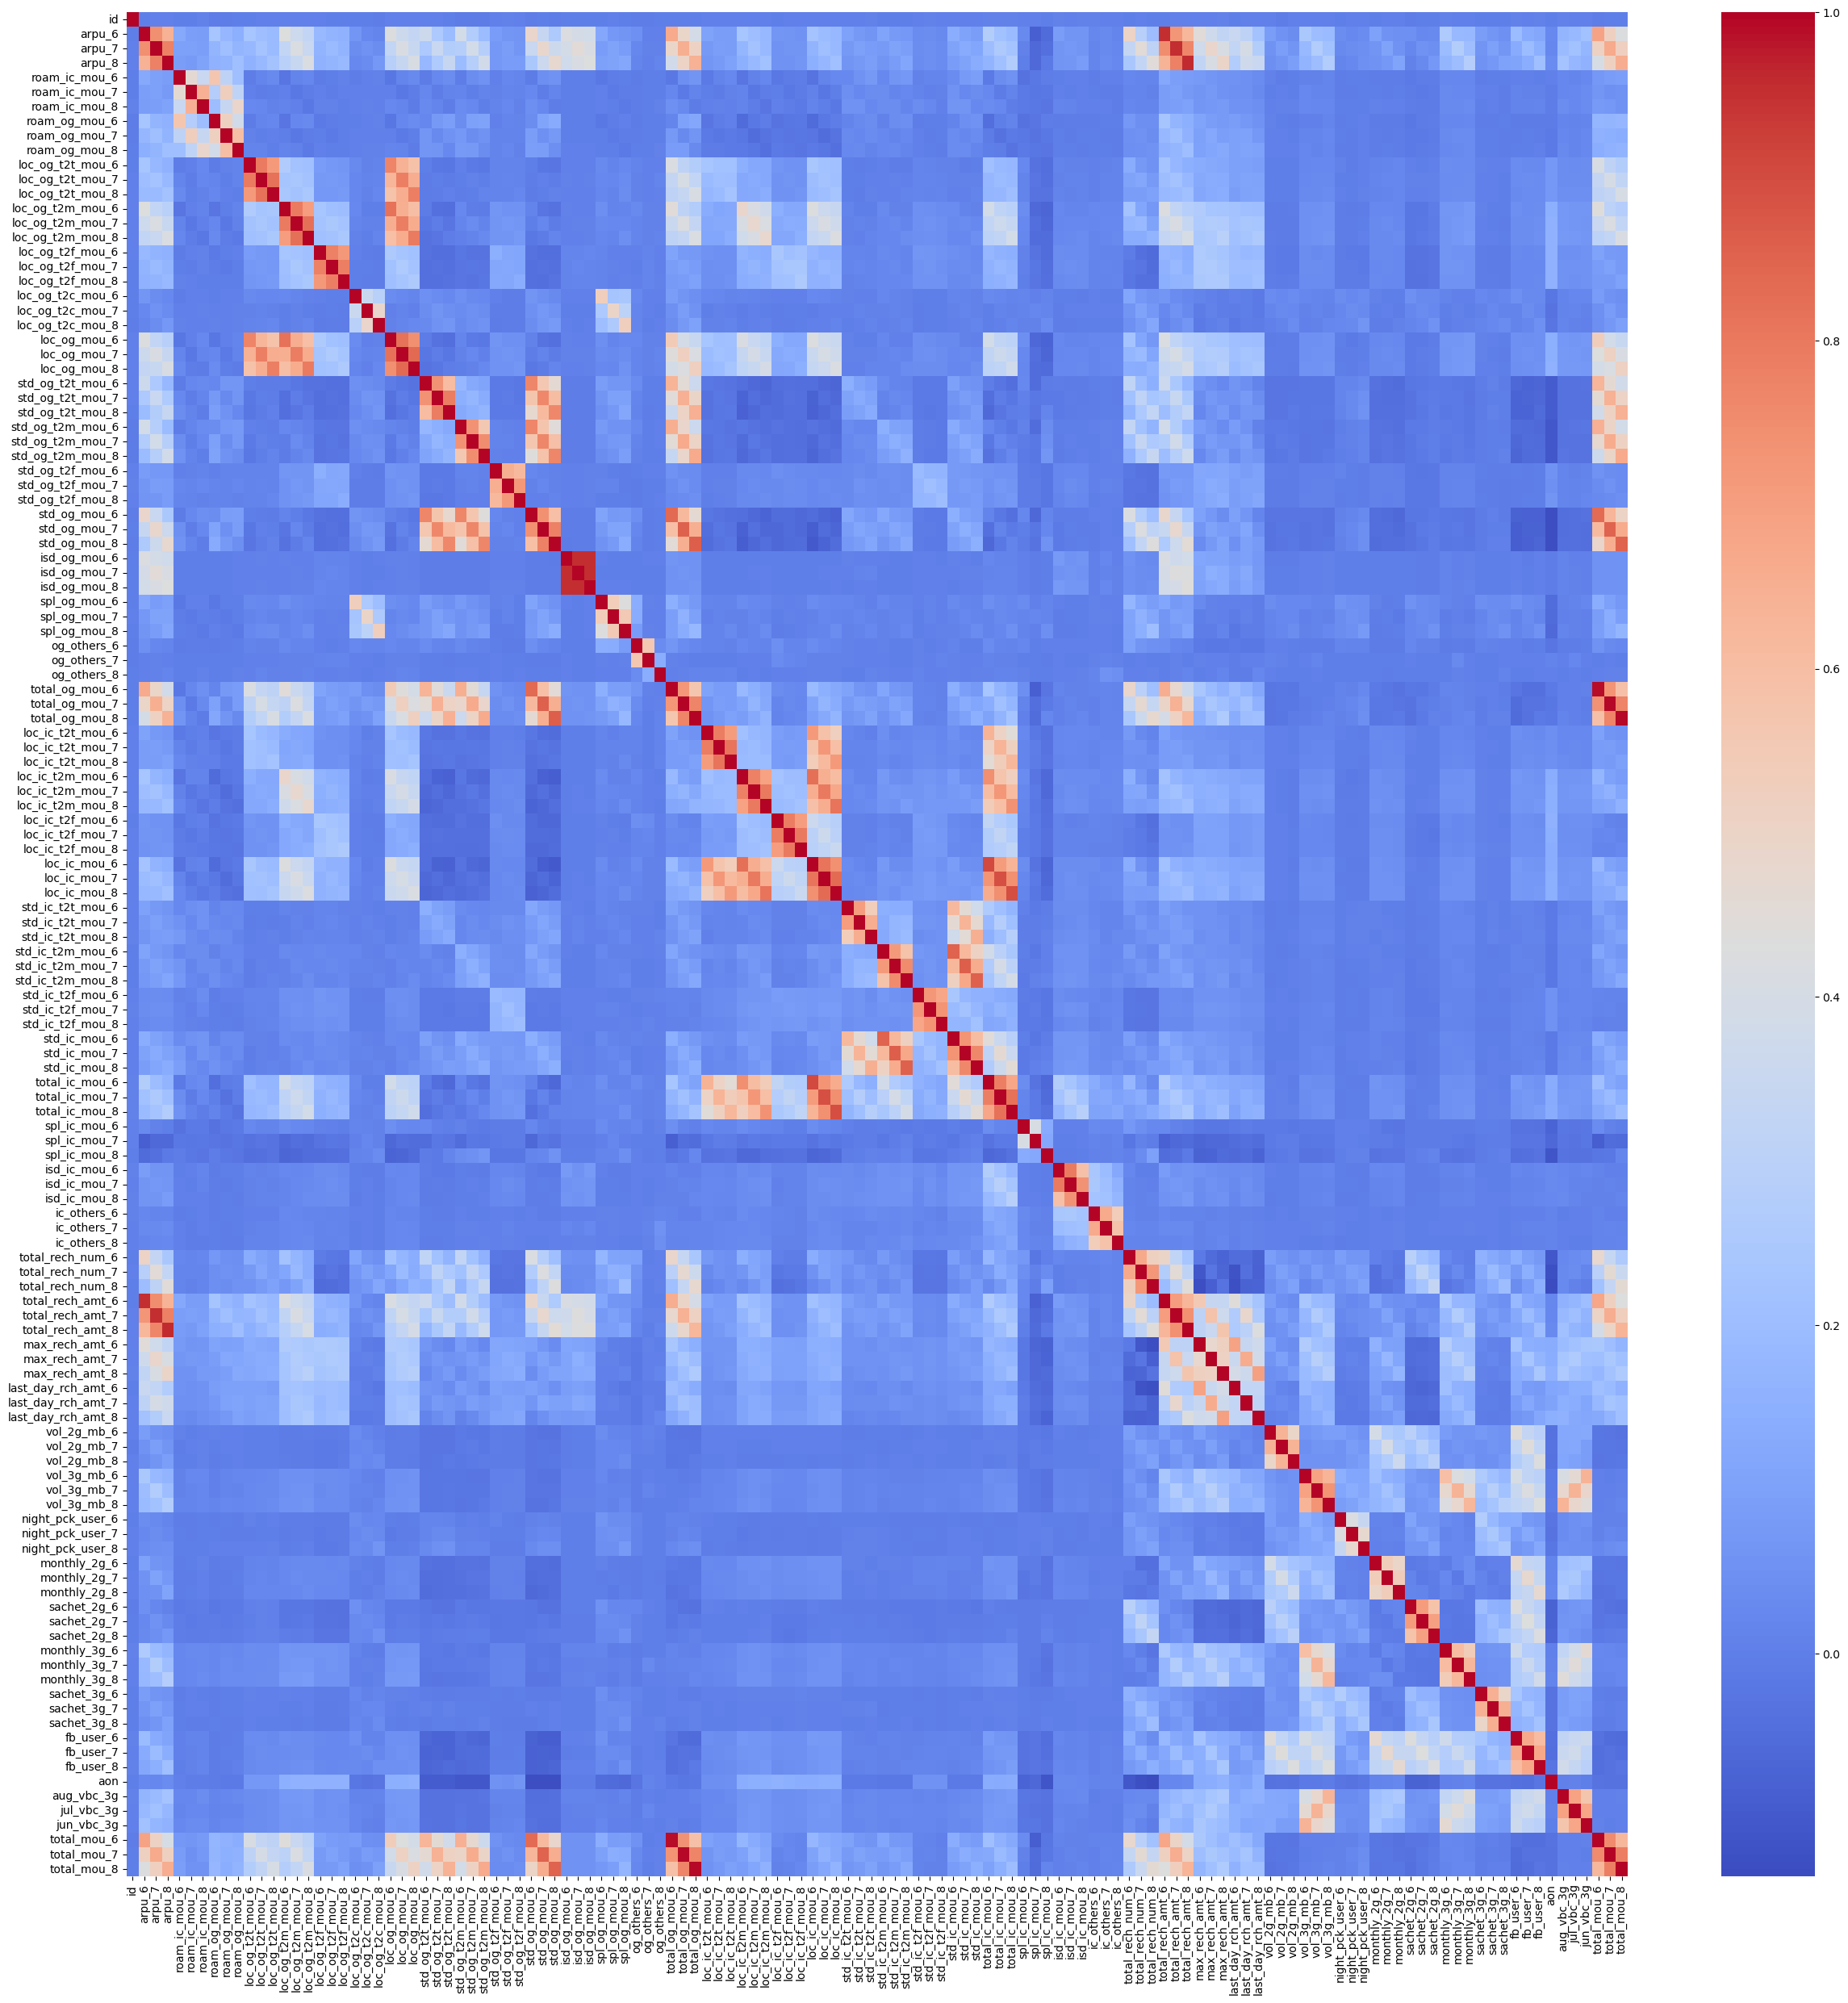

In [39]:
print(correlationMatrix)
plt.figure(figsize=(30, 30))
hm = sns.heatmap(correlationMatrix, cmap='coolwarm')
plt.show()

We could observe multi-collinearity between feature variables. This will lead to High Variance in the estimated coefficients. So we need to remove one of them in each collinearity pair.

In [40]:
def identify_multicollinear_columns_v2(df, threshold=0.75):
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()
    
    # Get pairs of highly correlated columns above the threshold
    collinear_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold:
                collinear_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    
    # Calculate the sum of correlations for each column
    col_corr_sum = corr_matrix.sum()
    
    # Decide which columns to keep
    columns_to_remove = set()

    # We remove features such that we don't remove both in a column pair and also make sure we only
    # remove the column if the correlation sum is greater than the other in the pair
    for col1, col2, corr_value in collinear_pairs:
        if col1 not in columns_to_remove and col2 not in columns_to_remove:
            if col_corr_sum[col1] > col_corr_sum[col2]:
                columns_to_remove.add(col1)
            else:
                columns_to_remove.add(col2)
    
    return collinear_pairs, list(columns_to_remove)

In [41]:
# Identify multicollinear columns
collinear_pairs, columns_to_remove = identify_multicollinear_columns_v2(data, 0.75)

print(f"Collinear Pairs: {len(collinear_pairs)} ")
for pair in collinear_pairs:
    print(pair)

print(f"\nCollinear Columns to Remove: {len(columns_to_remove)}")
print(columns_to_remove)

Collinear Pairs: 68 
('arpu_8', 'arpu_7', 0.7823318999053633)
('loc_og_t2t_mou_7', 'loc_og_t2t_mou_6', 0.7936445195042349)
('loc_og_t2t_mou_8', 'loc_og_t2t_mou_7', 0.8175408736170799)
('loc_og_t2m_mou_7', 'loc_og_t2m_mou_6', 0.7948136152679364)
('loc_og_t2m_mou_8', 'loc_og_t2m_mou_7', 0.8186611169401858)
('loc_og_t2f_mou_7', 'loc_og_t2f_mou_6', 0.7799473914095846)
('loc_og_t2f_mou_8', 'loc_og_t2f_mou_7', 0.7833048420298376)
('loc_og_mou_6', 'loc_og_t2t_mou_6', 0.7733955480158915)
('loc_og_mou_6', 'loc_og_t2m_mou_6', 0.8138280648979287)
('loc_og_mou_7', 'loc_og_t2t_mou_7', 0.783470580765618)
('loc_og_mou_7', 'loc_og_t2m_mou_7', 0.7900837652095054)
('loc_og_mou_7', 'loc_og_mou_6', 0.8157140545070068)
('loc_og_mou_8', 'loc_og_t2t_mou_8', 0.7857264176439137)
('loc_og_mou_8', 'loc_og_t2m_mou_8', 0.7923082422937794)
('loc_og_mou_8', 'loc_og_mou_7', 0.8374889590570087)
('std_og_t2t_mou_8', 'std_og_t2t_mou_7', 0.7870580700397327)
('std_og_mou_6', 'std_og_t2t_mou_6', 0.7660790816870807)
('std_o

In [42]:
data.shape

(69999, 129)

In [43]:
data.drop(columns=columns_to_remove, inplace=True)

In [44]:
# lets again analyse for columns more than 70%
# Get all column pairs that have high correlation between them
print_correlated_column_pairs_with_corr_value(data, threshold=0.75)

No column pairs found with correlation greater than 0.75


[]

                     id  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
id             1.000000      -0.000057      -0.001996       0.006709   
roam_ic_mou_6 -0.000057       1.000000       0.464917       0.351910   
roam_ic_mou_7 -0.001996       0.464917       1.000000       0.647505   
roam_ic_mou_8  0.006709       0.351910       0.647505       1.000000   
roam_og_mou_6 -0.005571       0.567586       0.276841       0.199528   
...                 ...            ...            ...            ...   
fb_user_8      0.006872       0.001498       0.007947       0.016350   
aon           -0.000702       0.005619      -0.005147      -0.004048   
aug_vbc_3g     0.006768       0.021724       0.023781       0.038803   
jul_vbc_3g     0.004040       0.018065       0.026215       0.026935   
jun_vbc_3g     0.003071       0.025563       0.035394       0.033661   

               roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
id                 -0.005571      -0.006522      -0.000

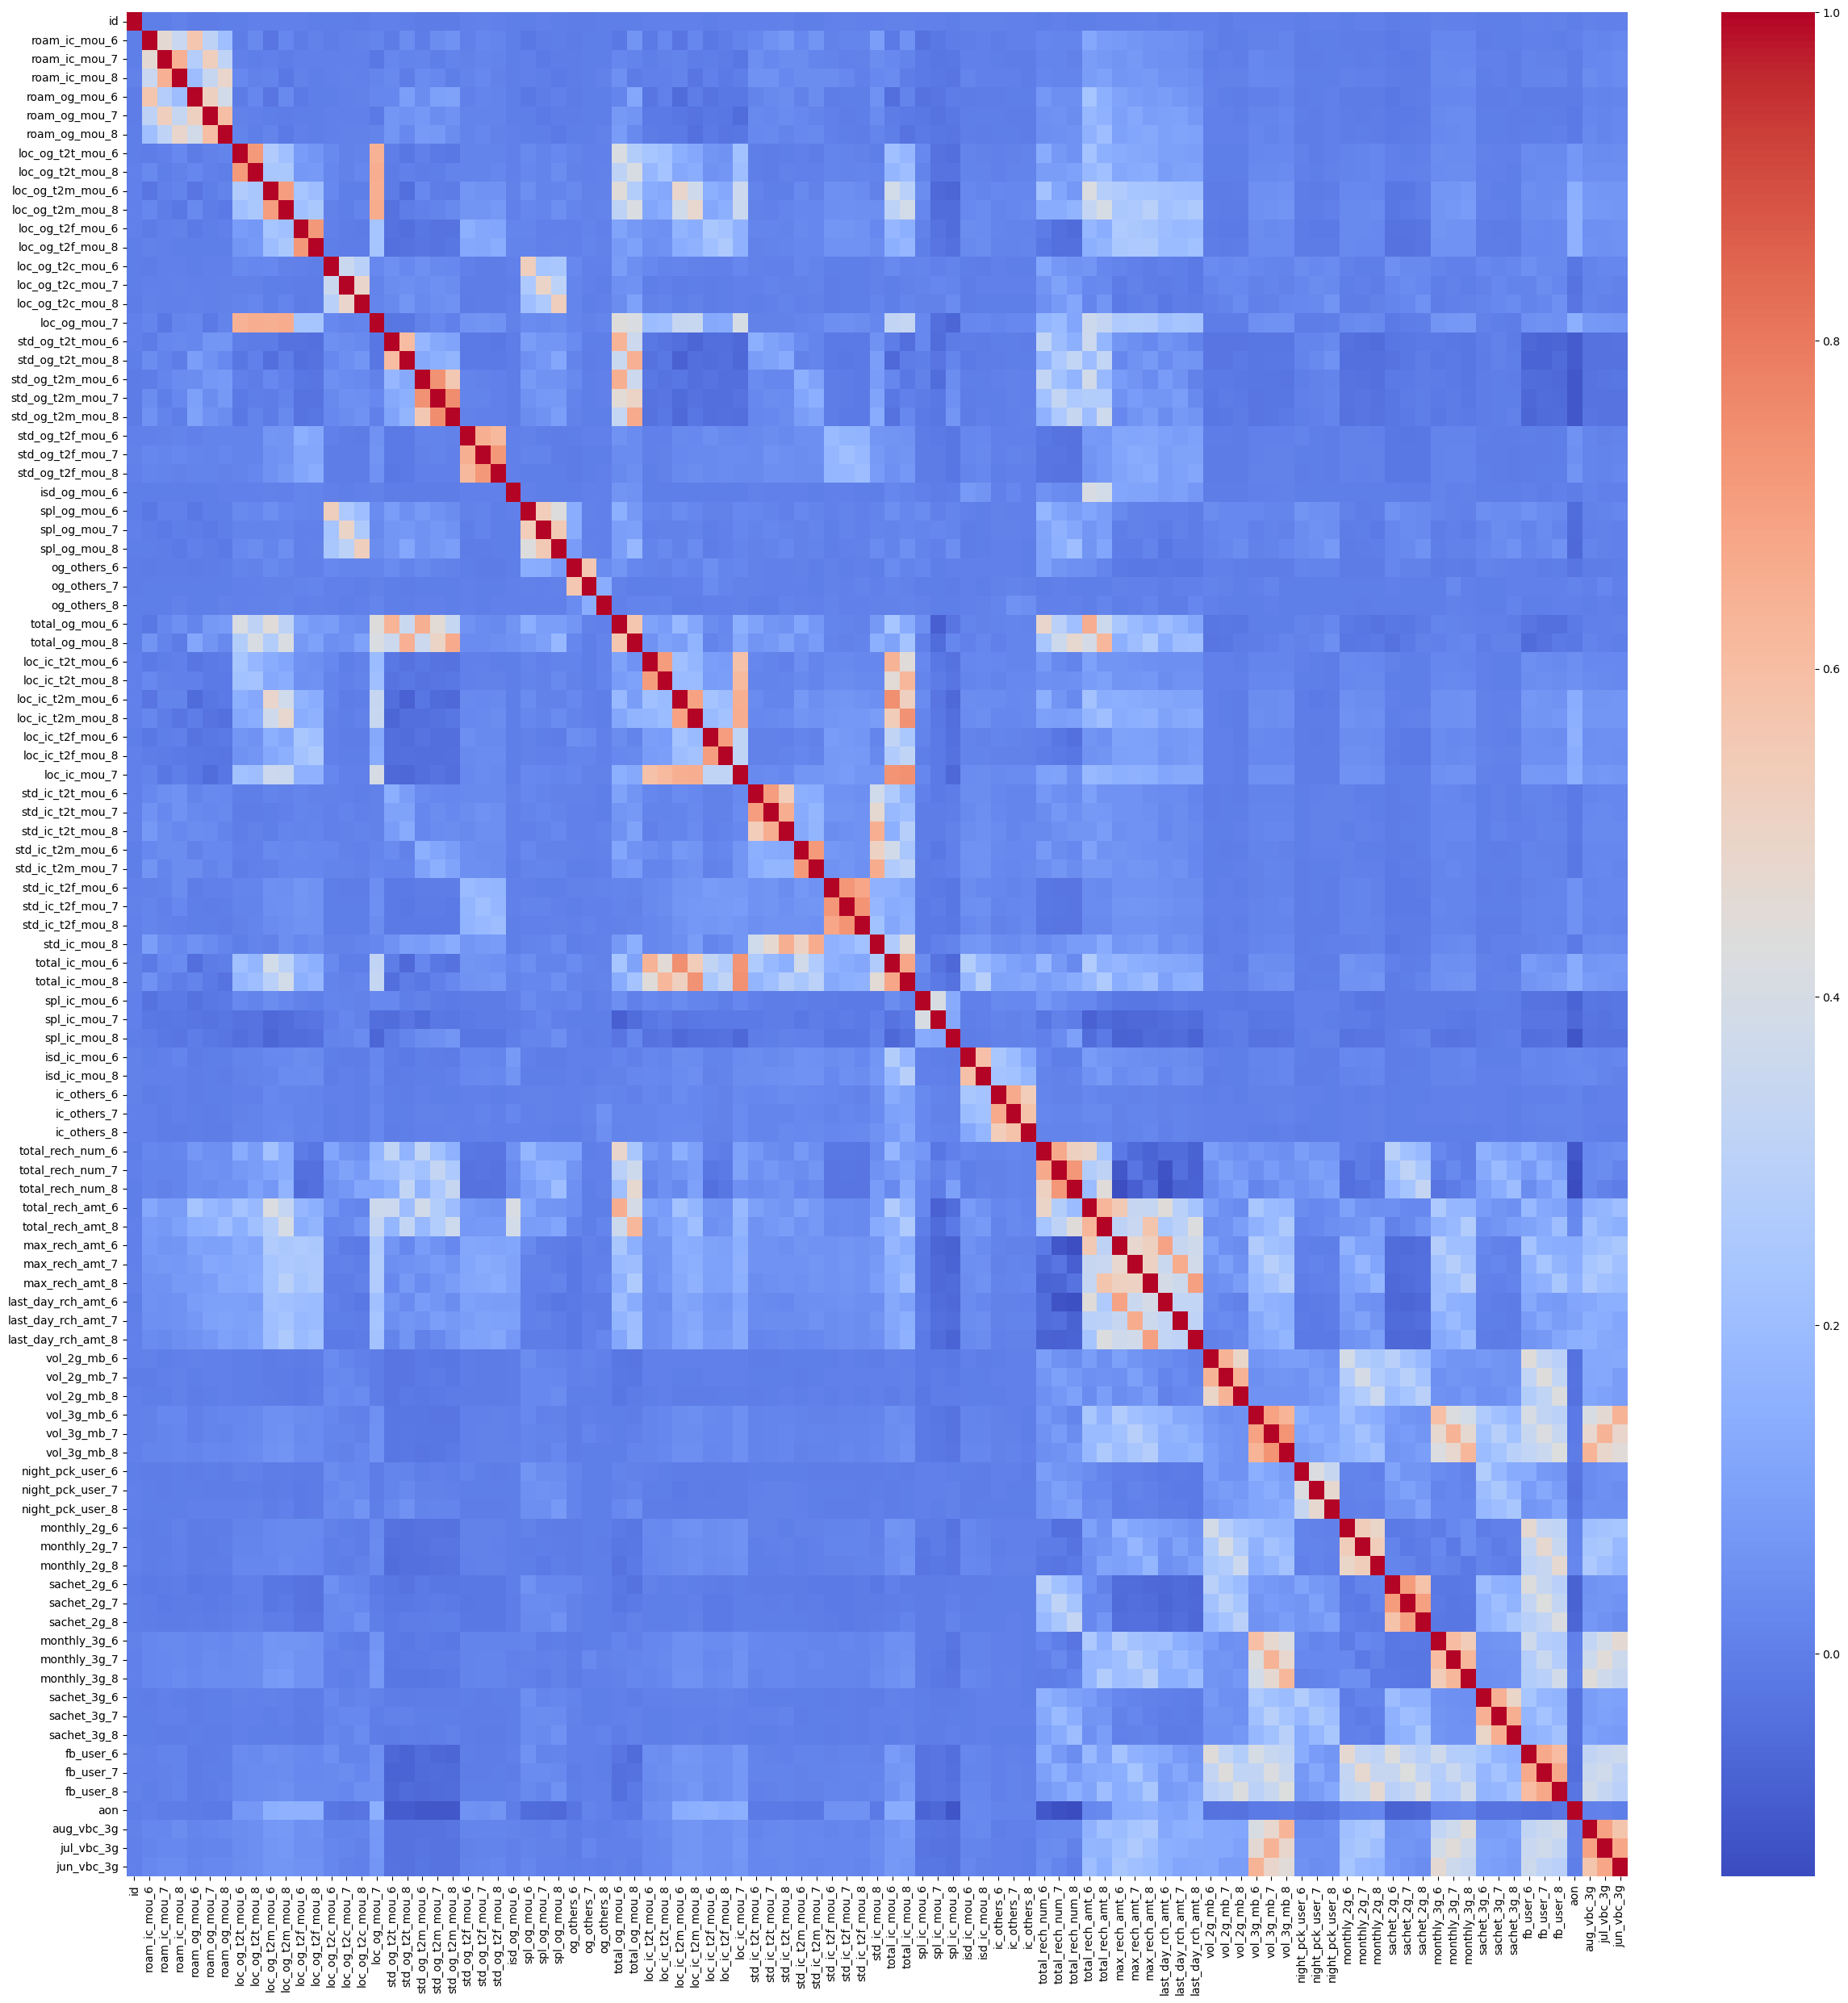

In [119]:
numerical_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_cols.remove('churn_probability') #Removing target variable
correlationMatrix = data[numerical_cols].corr()
print(correlationMatrix)
plt.figure(figsize=(30, 30))
hm = sns.heatmap(correlationMatrix, cmap='coolwarm')
plt.show()

As we know we have much better feature variables, We will use further analysis like PCA etc to resolve multi-collinearity issue with some columns

In [45]:
data.head(3)

id  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0   0            0.0            0.0            0.0            0.0   
1   1            0.0            0.0            0.0            0.0   
2   2            0.0            0.0            0.0            0.0   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_8  \
0            0.0            0.0              2.23              0.28   
1            0.0            0.0              0.00              0.00   
2            0.0            0.0              0.53              0.00   

   loc_og_t2m_mou_6  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
0              5.29  ...            0            0        0.0        0.0   
1              0.00  ...            0            0        0.0        1.0   
2             24.11  ...            0            0        0.0        0.0   

   fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0        0.0  1958         0.0         0.0         0.0                  0  
1        0.0   710         0.0         0.0         0.0                  0  
2        0.0   882         0.0         0.0         0.0                  0  

[3 rows x 100 columns]

In [46]:
data['churn_probability'].value_counts()

churn_probability
0    62867
1     7132
Name: count, dtype: int64

In [47]:
data['churn_probability'].isna().sum()

0

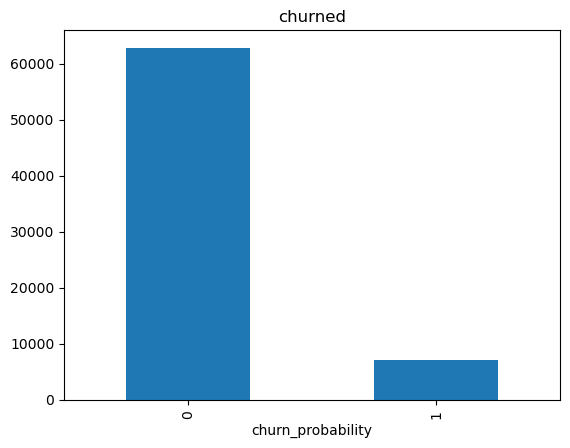

In [48]:
# Visualizing the Barplot of the churned values
data['churn_probability'].value_counts().plot(kind ='bar').set_title('churned')
plt.show()

churn_probability
0    89.811283
1    10.188717
Name: count, dtype: float64


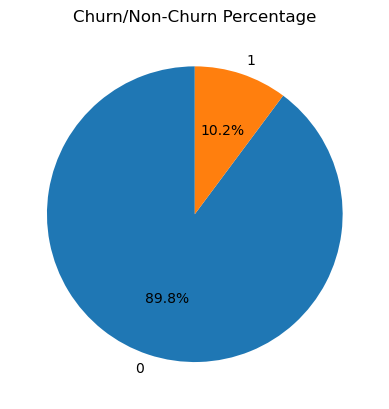

In [49]:
# Checking out churn/non churn percentage to know about the data distribution
churn_percentage = (data['churn_probability'].value_counts() / len(data)) * 100
print(churn_percentage)
# Plotting the pie chart with percentages
churn_percentage.plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.ylabel('')  # Hide the y-label to make the plot cleaner
plt.title('Churn/Non-Churn Percentage')
plt.show()

Summary: Only 10% of customers have churned with the available data set, with almost 89.8% have not churned and shows class imbalance

In [50]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 100 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  69999 non-null  int64  
 1   roam_ic_mou_6       67231 non-null  float64
 2   roam_ic_mou_7       67312 non-null  float64
 3   roam_ic_mou_8       66296 non-null  float64
 4   roam_og_mou_6       67231 non-null  float64
 5   roam_og_mou_7       67312 non-null  float64
 6   roam_og_mou_8       66296 non-null  float64
 7   loc_og_t2t_mou_6    67231 non-null  float64
 8   loc_og_t2t_mou_8    66296 non-null  float64
 9   loc_og_t2m_mou_6    67231 non-null  float64
 10  loc_og_t2m_mou_8    66296 non-null  float64
 11  loc_og_t2f_mou_6    67231 non-null  float64
 12  loc_og_t2f_mou_8    66296 non-null  float64
 13  loc_og_t2c_mou_6    67231 non-null  float64
 14  loc_og_t2c_mou_7    67312 non-null  float64
 15  loc_og_t2c_mou_8    66296 non-null  float64
 16  loc

## 3.6 Univariate and Bivariate analysis of Numerical Variables

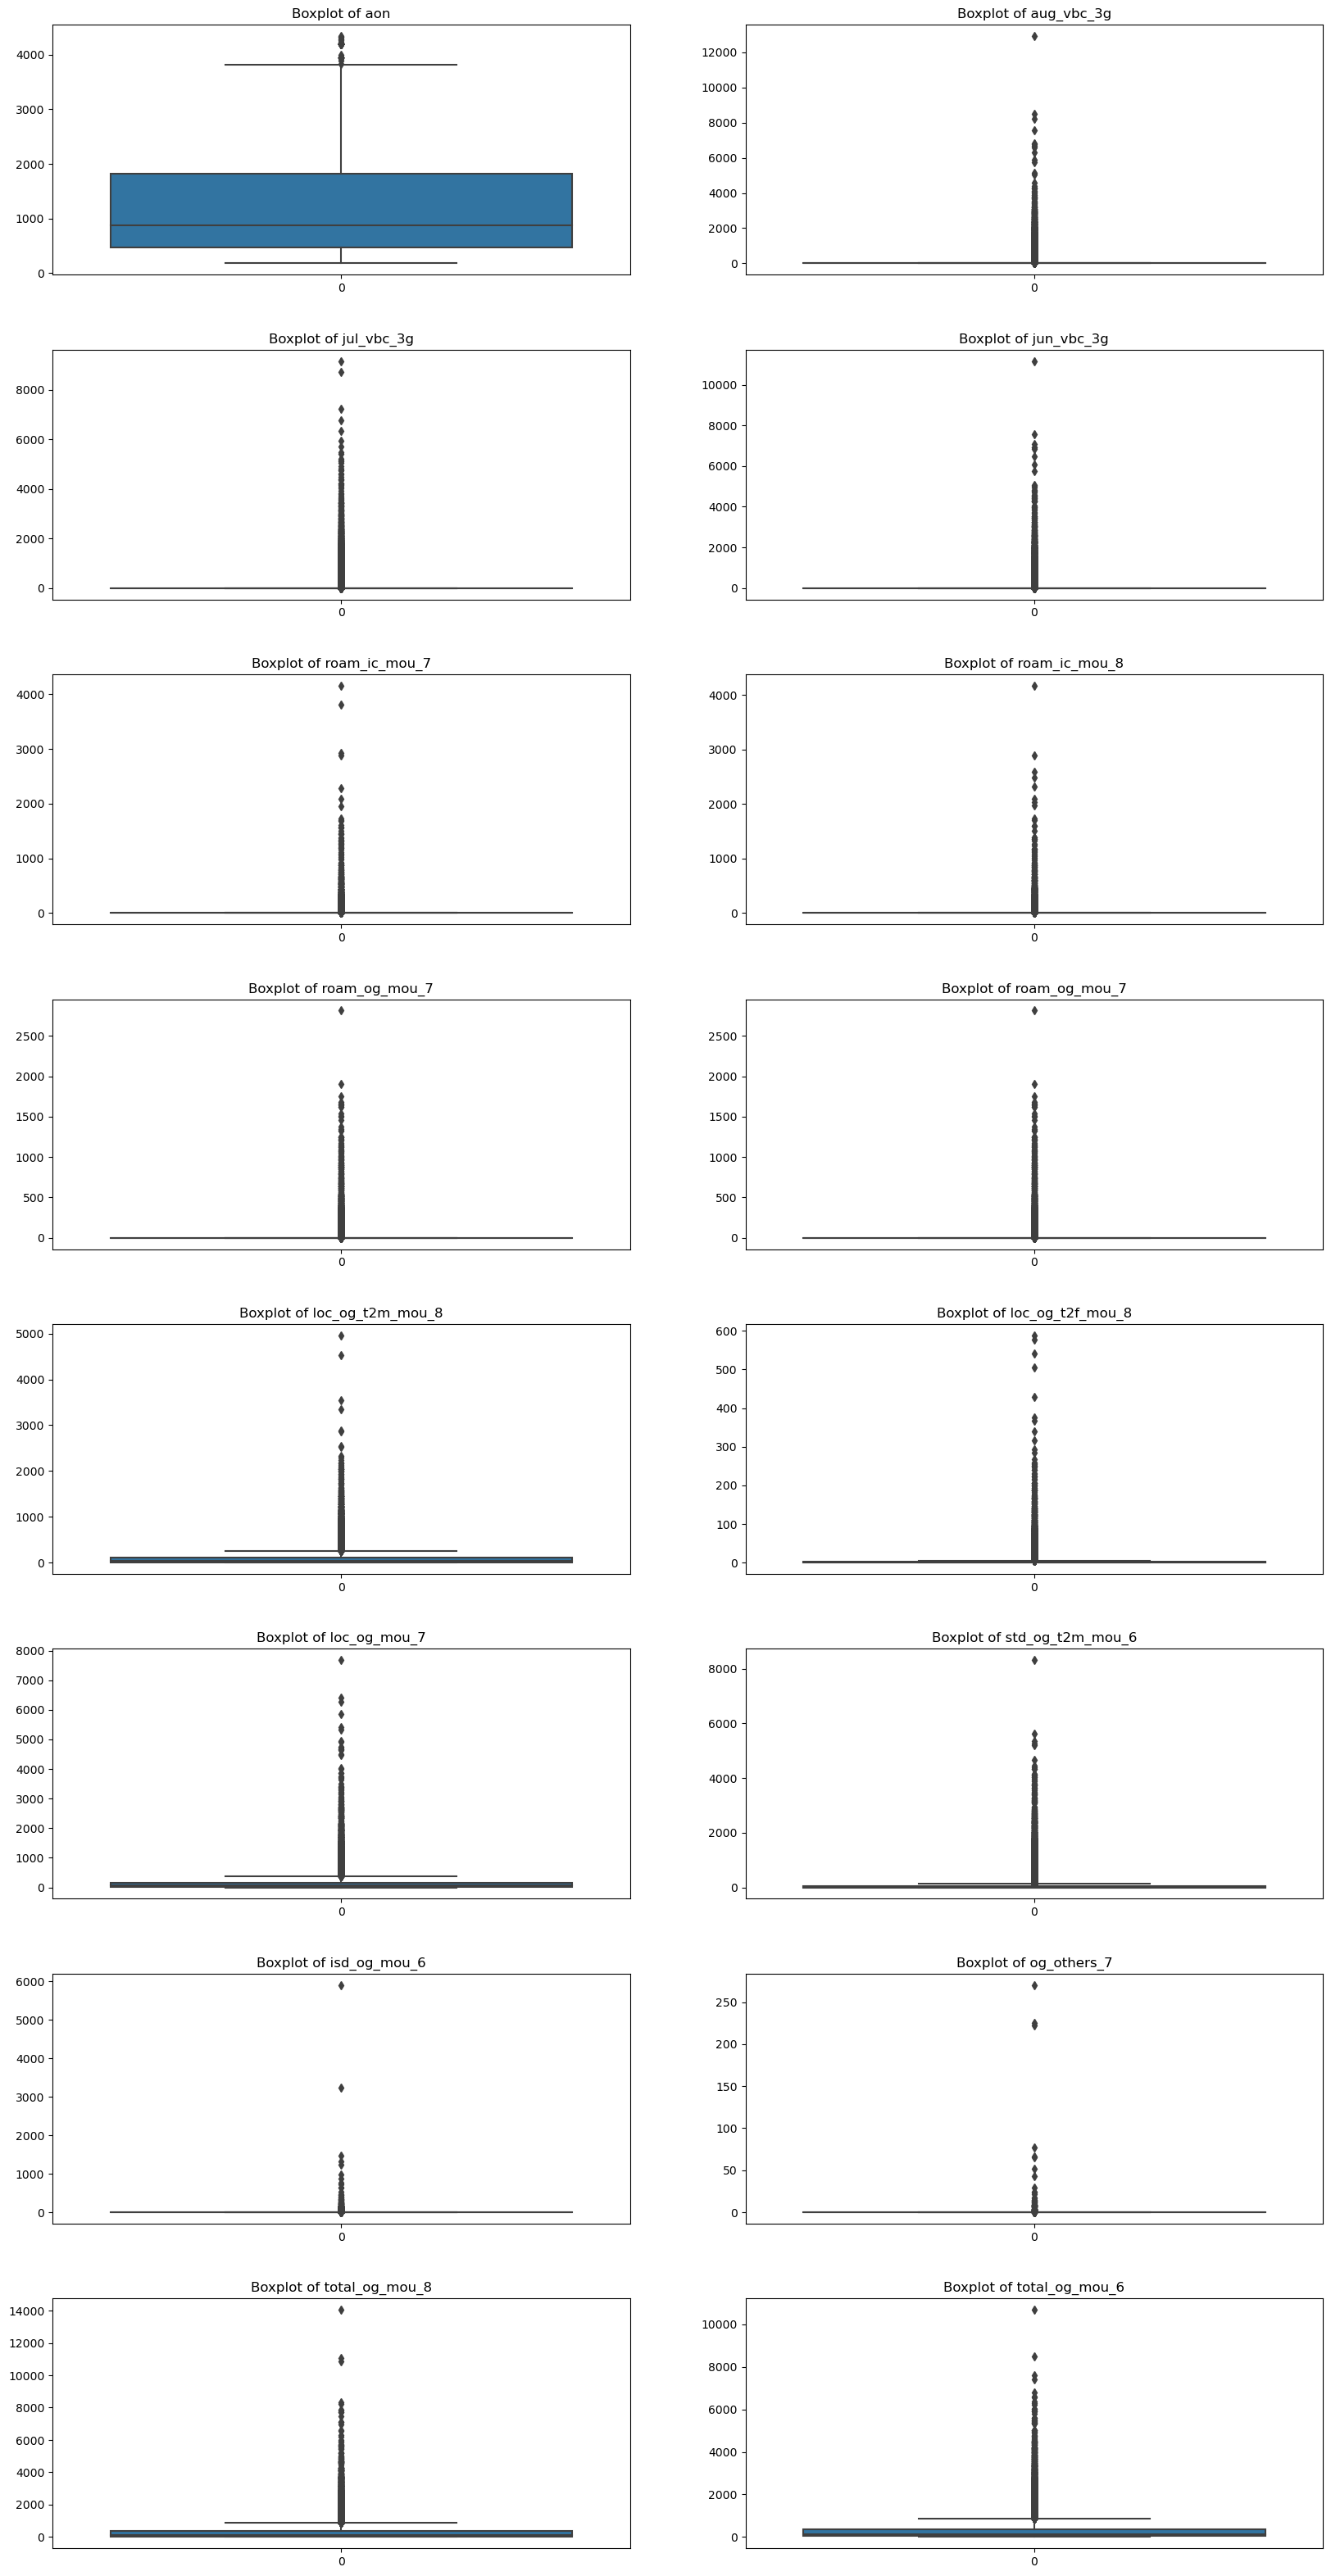

In [51]:
def plot_boxplots(df, columns=None):
    """
    Plots boxplots for each numerical column in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list, optional): List of columns to plot. If None, all numerical columns are plotted.
    """
    # Select numerical columns if no specific columns are provided
    if columns is None:
        columns = df.select_dtypes(include='number').columns.tolist()
    
    num_cols = len(columns)
    num_rows = (num_cols + 1) // 2  # Determine the number of rows needed
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))
    axes = axes.flatten()  # Flatten the axes array for easy indexing
    
    for index, col in enumerate(columns):
        sns.boxplot(df[col], ax=axes[index])
        axes[index].set_title(f'Boxplot of {col}')
    
    # Remove any unused subplots
    for i in range(num_cols, len(axes)):
        fig.delaxes(axes[i])
    
    plt.subplots_adjust(hspace=0.3) 
    plt.show() 
select_columns = [
'aon'       
,'aug_vbc_3g'
,'jul_vbc_3g'
,'jun_vbc_3g'
,'roam_ic_mou_7'
,'roam_ic_mou_8'
,'roam_og_mou_7'
,'roam_og_mou_7'
,'loc_og_t2m_mou_8'
,'loc_og_t2f_mou_8'
,'loc_og_mou_7'
,'std_og_t2m_mou_6'
,'isd_og_mou_6'
,'og_others_7'
,'total_og_mou_8'
,'total_og_mou_6'
]
plot_boxplots(data, columns=select_columns)

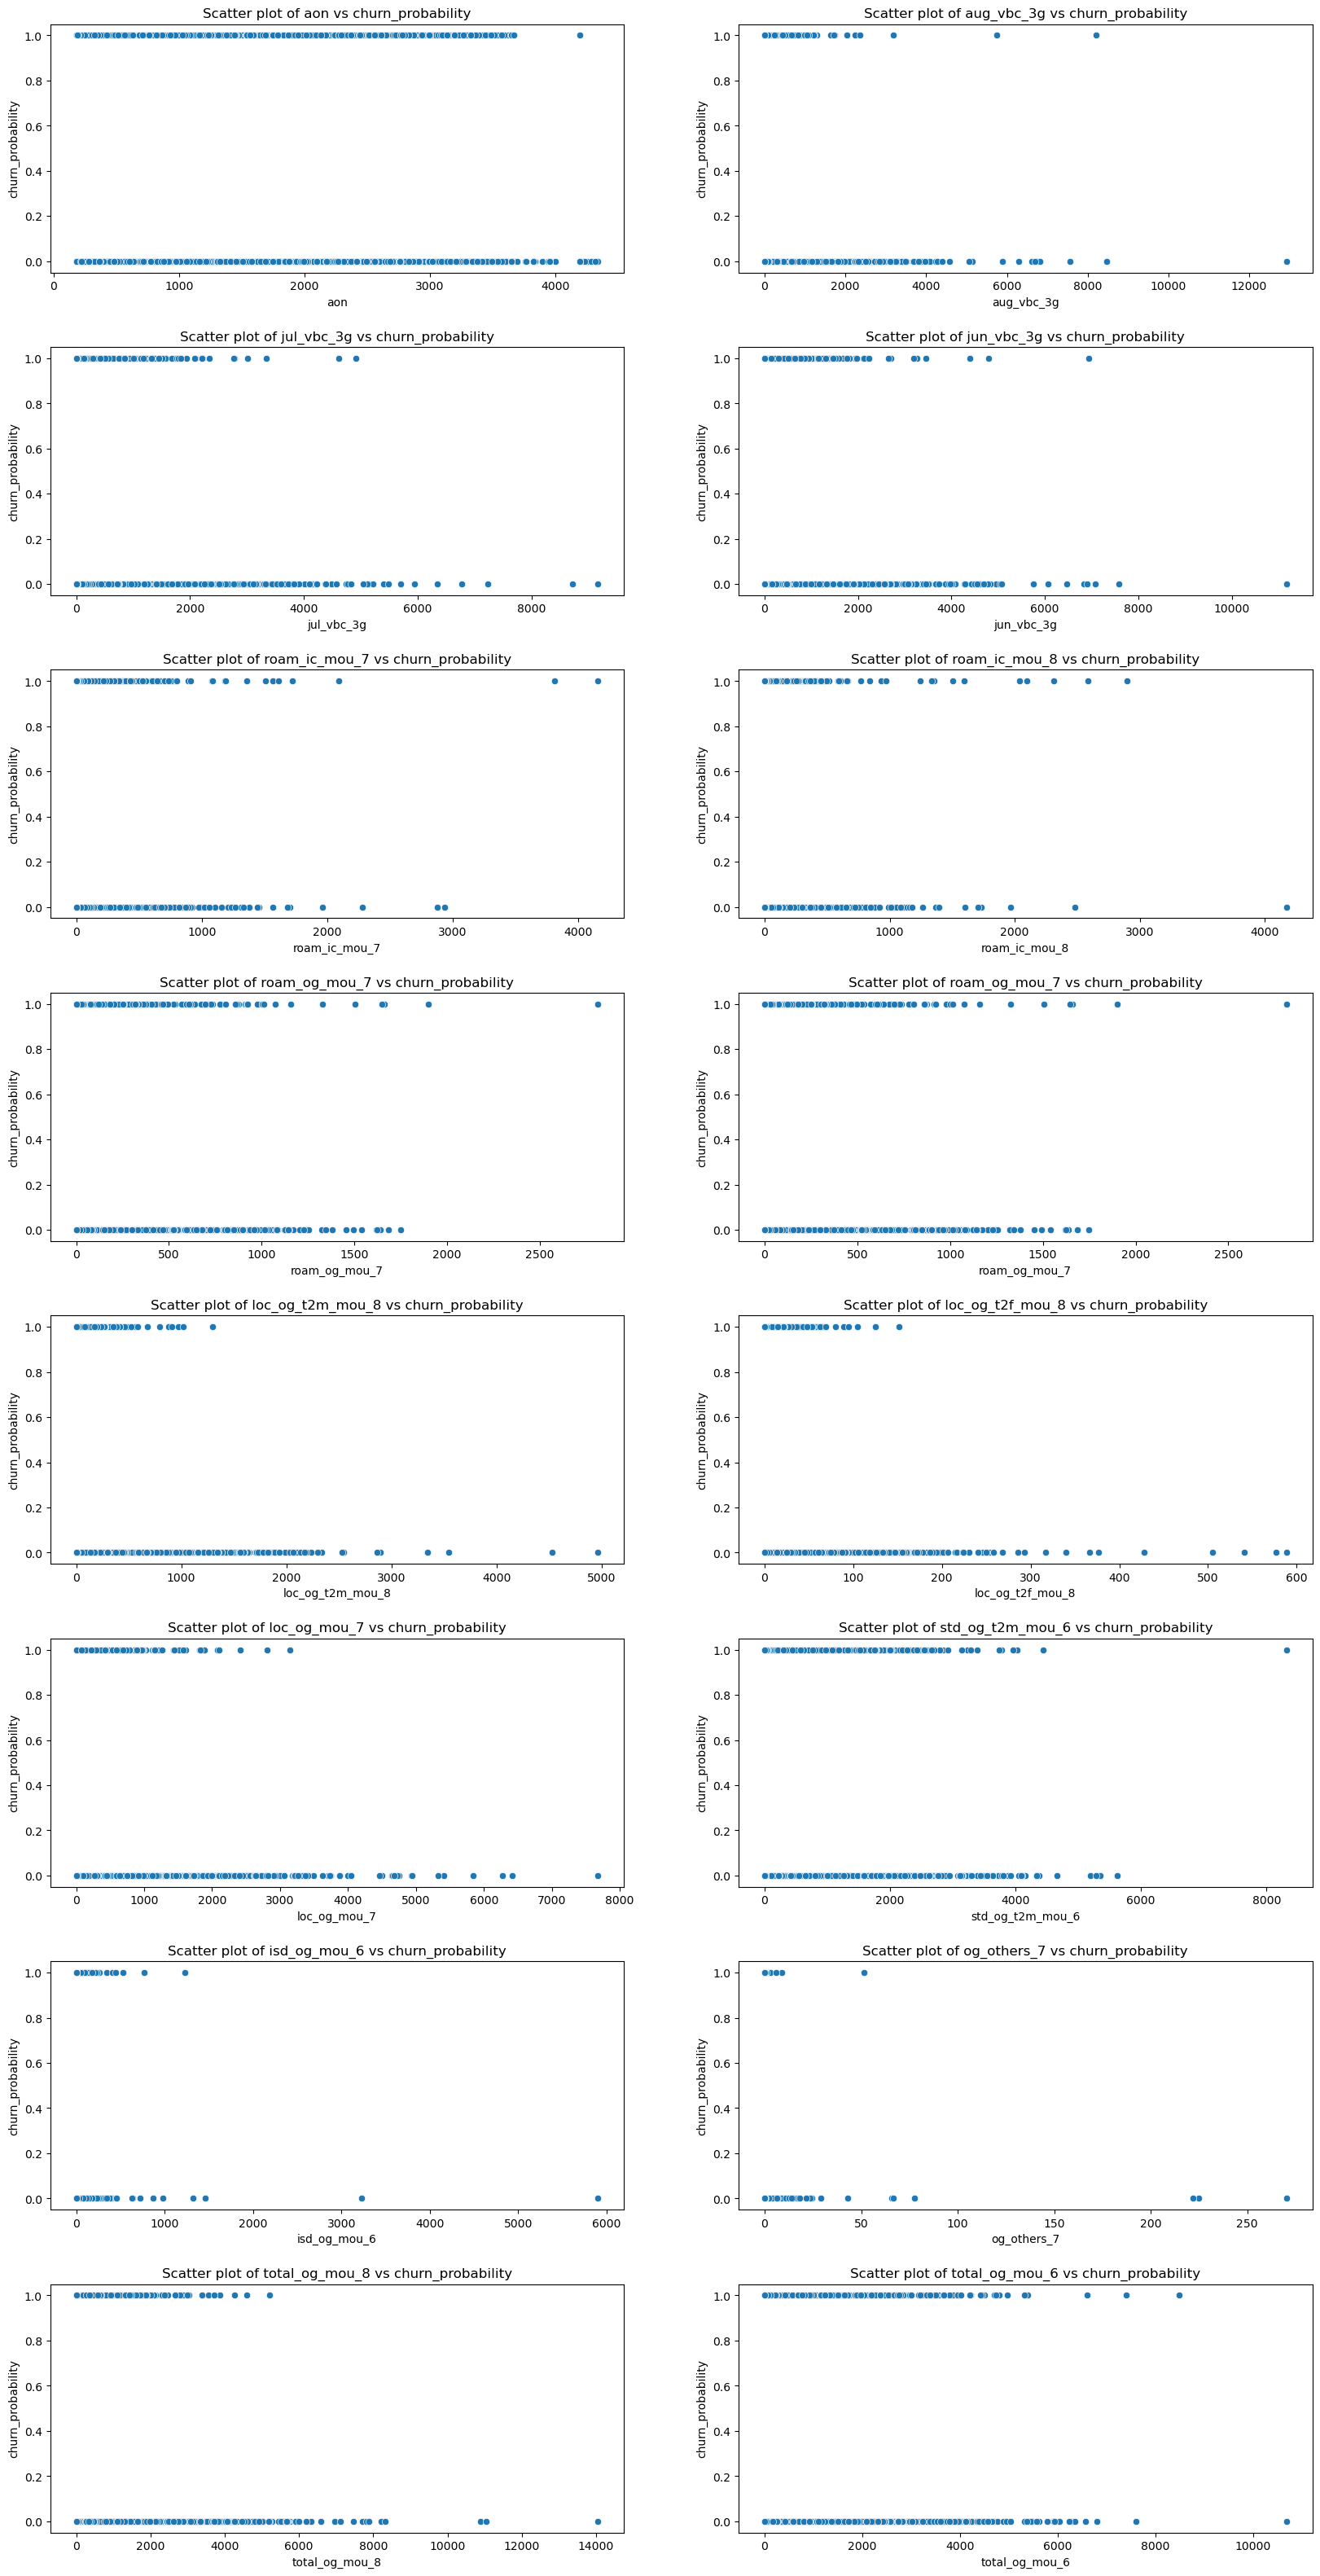

In [52]:
def plot_scatter_plots(df, target_variable, columns=None):
    """
    Plots scatter plots for each numerical column in the DataFrame against a target variable.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    target_variable (str): The name of the target variable column.
    columns (list, optional): List of columns to plot against the target variable. If None, all numerical columns are plotted.
    """
    # Select numerical columns if no specific columns are provided
    if columns is None:
        columns = df.select_dtypes(include='number').columns.tolist()
        columns.remove(target_variable)  # Remove target variable from the list if it is numeric
    
    num_cols = len(columns)
    num_rows = (num_cols + 1) // 2  # Determine the number of rows needed
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))
    axes = axes.flatten()  # Flatten the axes array for easy indexing
    
    for index, col in enumerate(columns):
        sns.scatterplot(x=df[col], y=df[target_variable], ax=axes[index])
        axes[index].set_title(f'Scatter plot of {col} vs {target_variable}')
    
    # Remove any unused subplots
    for i in range(num_cols, len(axes)):
        fig.delaxes(axes[i])
    
    plt.subplots_adjust(hspace=0.3) 
    plt.show()


plot_scatter_plots(data, target_variable='churn_probability', columns=select_columns)

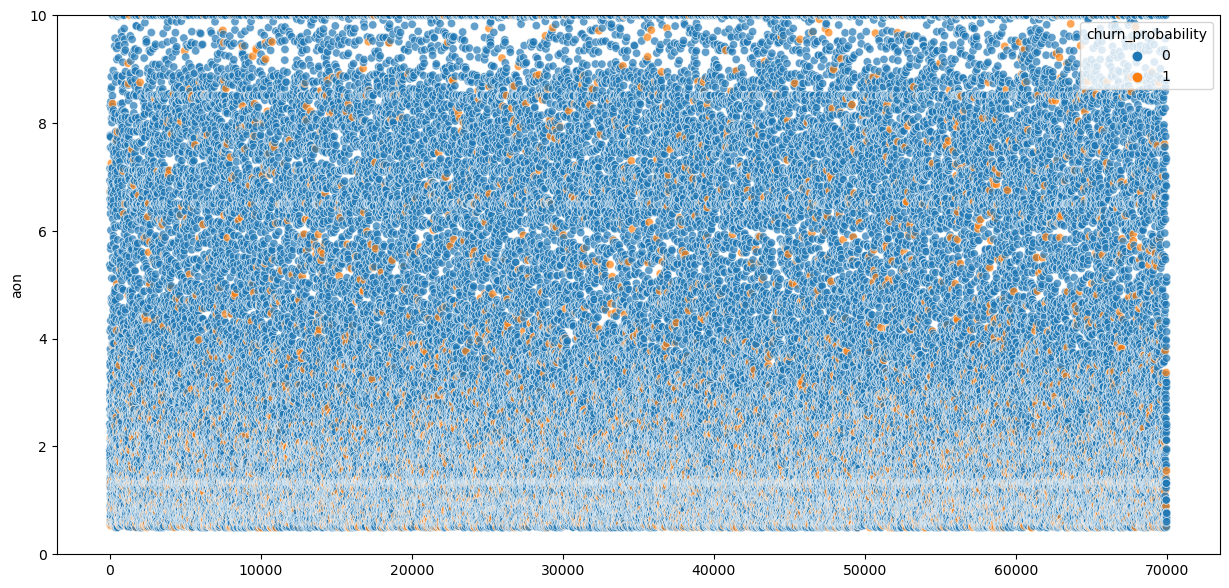

In [53]:
# Check churn based on tenure

plt.figure(figsize=(15,7))
sns.scatterplot(y=data['aon'] / 365, x=data.index, hue=data.churn_probability, alpha=0.7)
plt.ylim(0,10)
plt.show()

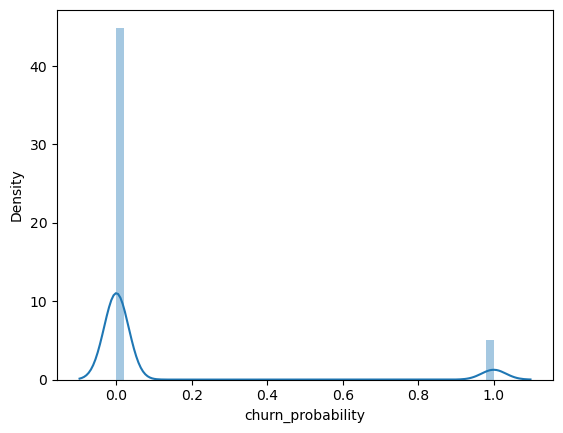

In [54]:
# Distribution of target variable

sns.distplot(data['churn_probability'])
plt.show()

## 3.7 Splitting train and test data to avoid any contamination of the test data

In [55]:
churnColumn = 'churn_probability'
allColumns = data.columns.tolist()
allColumns.remove(churnColumn)
X = data[allColumns]
y = data[churnColumn]

X.shape, y.shape

((69999, 99), (69999,))

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=46)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48999, 99), (21000, 99), (48999,), (21000,))

In [57]:
X_train.head()

id  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
40394  40394           0.00            0.0            0.0           0.00   
34929  34929          45.11            0.0            0.0          55.14   
69330  69330           0.00            0.0            0.0           0.00   
68617  68617            NaN            0.0            0.0            NaN   
45244  45244          31.69            0.0            0.0          51.44   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_8  \
40394           0.00            0.0              1.35             30.76   
34929           0.00            0.0              1.01              8.26   
69330           0.00            0.0             32.21             24.16   
68617          15.08            0.0               NaN              6.89   
45244           0.00            0.0              0.51              0.00   

       loc_og_t2m_mou_6  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  \
40394              2.71  ...            0            0            0   
34929              6.16  ...            0            0            0   
69330            111.11  ...            0            0            0   
68617               NaN  ...            0            0            0   
45244            215.94  ...            0            0            0   

       fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  \
40394        0.0        0.0        0.0   270         0.0         0.0   
34929        0.0        0.0        0.0   663         0.0         0.0   
69330        0.0        0.0        0.0  1459         0.0         0.0   
68617        0.0        0.0        0.0  1444         0.0         0.0   
45244        0.0        0.0        0.0   420         0.0         0.0   

       jun_vbc_3g  
40394         0.0  
34929         0.0  
69330         0.0  
68617         0.0  
45244         0.0  

[5 rows x 99 columns]

In [58]:
y_train.head()

40394    0
34929    0
69330    0
68617    0
45244    0
Name: churn_probability, dtype: int64

In [59]:
y_train.value_counts()

churn_probability
0    44097
1     4902
Name: count, dtype: int64

## 3.8 Handling Missing data

First lets analyse the missing data. We can use missingno library for quick visualizations.

In [60]:
#msno.bar(X_train)

In [61]:
#msno.matrix(X_train)

Lets also calculate the % missing data for each column:

In [62]:
missing_data_percent = 100*X_train.isnull().sum()/len(y_train)
missing_data_percent

id               0.000000
roam_ic_mou_6    3.869467
roam_ic_mou_7    3.798037
roam_ic_mou_8    5.273577
roam_og_mou_6    3.869467
                   ...   
fb_user_8        0.000000
aon              0.000000
aug_vbc_3g       0.000000
jul_vbc_3g       0.000000
jun_vbc_3g       0.000000
Length: 99, dtype: float64

Since too much missing information would make a column not really a great predictor for churn, we drop these columns and keep only the ones which have less than 40% missing data.

In [63]:
[missing_data_percent.le(40)]

[id               True
 roam_ic_mou_6    True
 roam_ic_mou_7    True
 roam_ic_mou_8    True
 roam_og_mou_6    True
                  ... 
 fb_user_8        True
 aon              True
 aug_vbc_3g       True
 jul_vbc_3g       True
 jun_vbc_3g       True
 Length: 99, dtype: bool]

In [64]:
new_vars = missing_data_percent[missing_data_percent.le(40)].index
print(new_vars)

Index(['id', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_7',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'isd_og_mou_6', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'total_og_mou_6', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2

In [65]:
X_train_filtered = X_train[new_vars]
X_train_filtered.shape

(48999, 99)

In [66]:
X_test_filtered = X_test[new_vars]

In [67]:
missing_data_percent = X_train_filtered.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_7',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'isd_og_mou_6', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_6', 

In [68]:
imp = SimpleImputer(strategy='constant', fill_value=0)
X_train_filtered[impute_cols] = imp.fit_transform(X_train_filtered[impute_cols])

In [69]:
X_test_filtered[impute_cols] = imp.transform(X_test[impute_cols])

<Axes: >

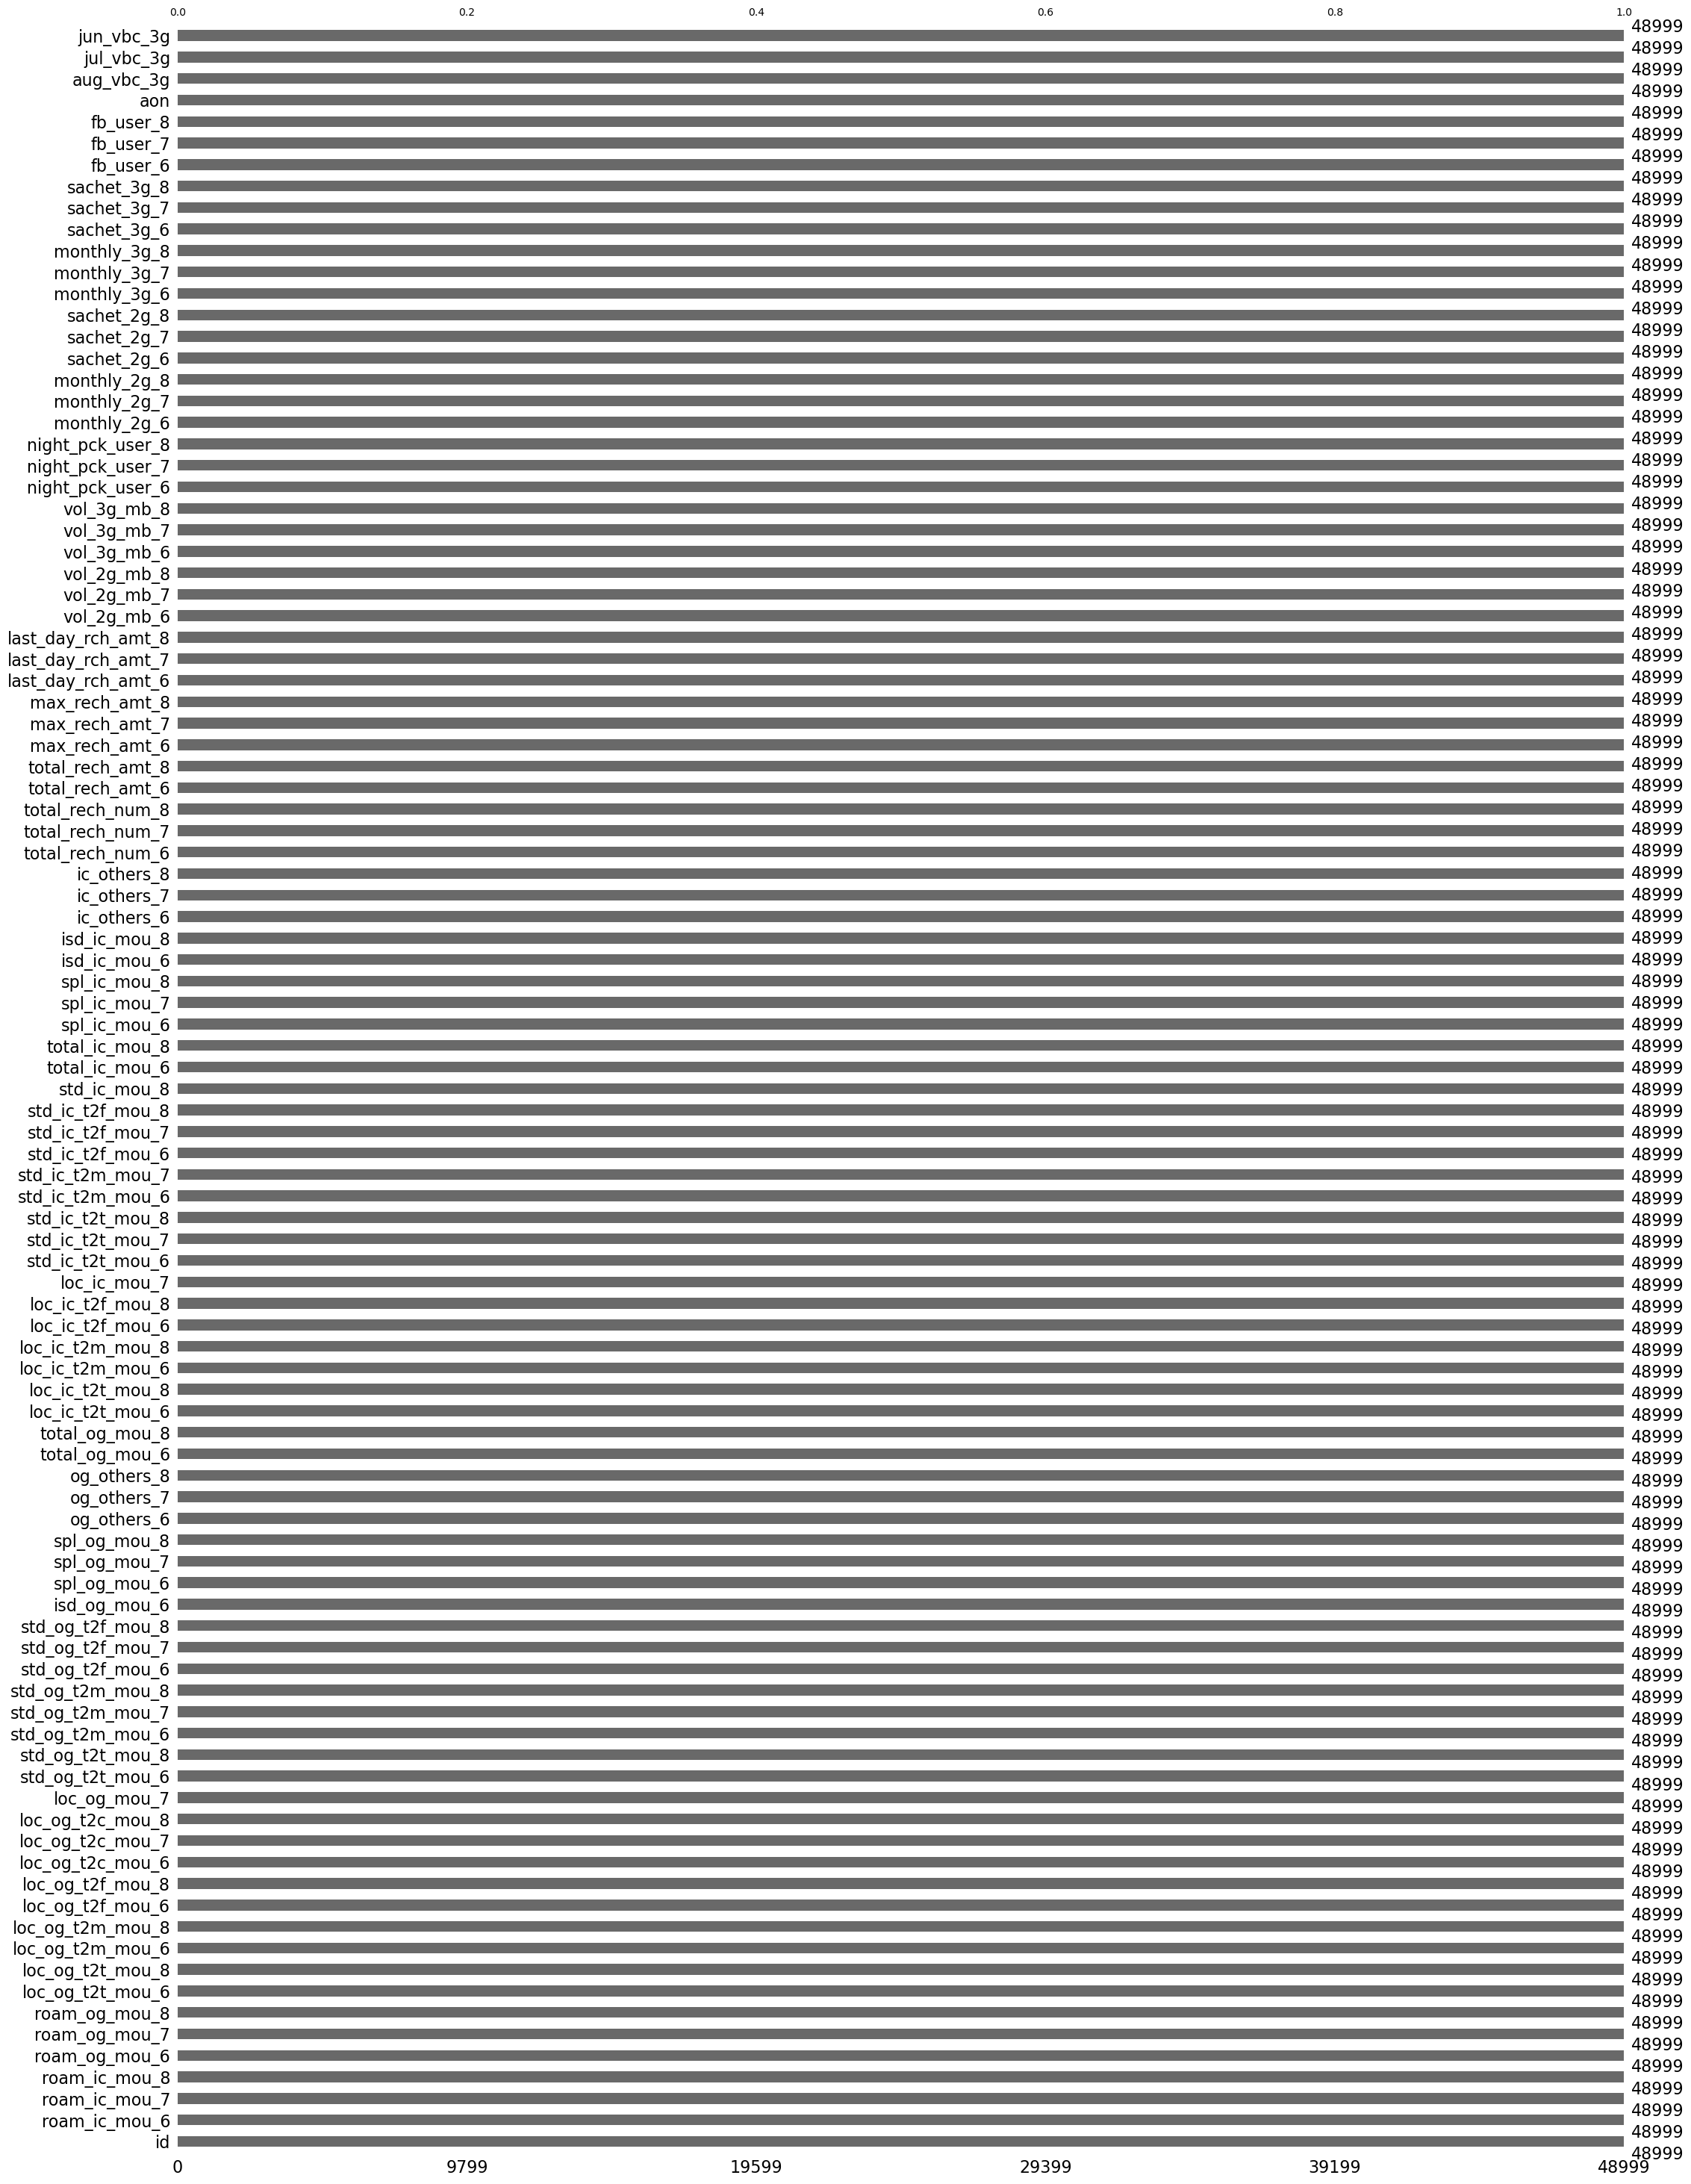

In [70]:
msno.bar(X_train_filtered)

In [71]:
X_train_filtered.describe()

id  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count  48999.000000   48999.000000   48999.000000   48999.000000   
mean   34997.423151       9.545166       6.694216       6.544322   
std    20226.119860      56.701940      50.908299      48.815548   
min        0.000000       0.000000       0.000000       0.000000   
25%    17448.500000       0.000000       0.000000       0.000000   
50%    35018.000000       0.000000       0.000000       0.000000   
75%    52522.500000       0.000000       0.000000       0.000000   
max    69998.000000    2850.980000    2877.060000    2480.060000   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
count   48999.000000   48999.000000   48999.000000      48999.000000   
mean       13.728770       9.520571       9.288081         44.736122   
std        71.913506      58.122584      61.911657        146.757744   
min         0.000000       0.000000       0.000000          0.000000   
25%         0.000000       0.000000       0.000000          0.980000   
50%         0.000000       0.000000       0.000000         10.560000   
75%         0.000000       0.000000       0.000000         38.640000   
max      2337.160000    1900.060000    3493.360000       6431.330000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  ...   sachet_3g_6   sachet_3g_7  \
count      48999.000000      48999.000000  ...  48999.000000  48999.000000   
mean          43.073780         89.600434  ...      0.076512      0.081410   
std          152.361808        160.364124  ...      0.586912      0.629724   
min            0.000000          0.000000  ...      0.000000      0.000000   
25%            0.760000          7.330000  ...      0.000000      0.000000   
50%           10.040000         37.780000  ...      0.000000      0.000000   
75%           37.210000        105.400000  ...      0.000000      0.000000   
max        10752.560000       4212.040000  ...     29.000000     31.000000   

        sachet_3g_8     fb_user_6     fb_user_7     fb_user_8           aon  \
count  48999.000000  48999.000000  48999.000000  48999.000000  48999.000000   
mean       0.086839      0.230250      0.231923      0.235148   1217.972081   
std        0.699832      0.420997      0.422064      0.424095    948.189382   
min        0.000000      0.000000      0.000000      0.000000    180.000000   
25%        0.000000      0.000000      0.000000      0.000000    469.000000   
50%        0.000000      0.000000      0.000000      0.000000    867.000000   
75%        0.000000      0.000000      0.000000      0.000000   1808.000000   
max       41.000000      1.000000      1.000000      1.000000   4321.000000   

         aug_vbc_3g    jul_vbc_3g    jun_vbc_3g  
count  48999.000000  48999.000000  48999.000000  
mean      68.445660     66.333559     60.626015  
std      270.846072    270.317346    257.095899  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000  
max    12916.220000   9165.600000  11166.210000  

[8 rows x 99 columns]

## 3.9 Preprocessing

Lets start by analysing the univariate distributions of each feature.

<Axes: >

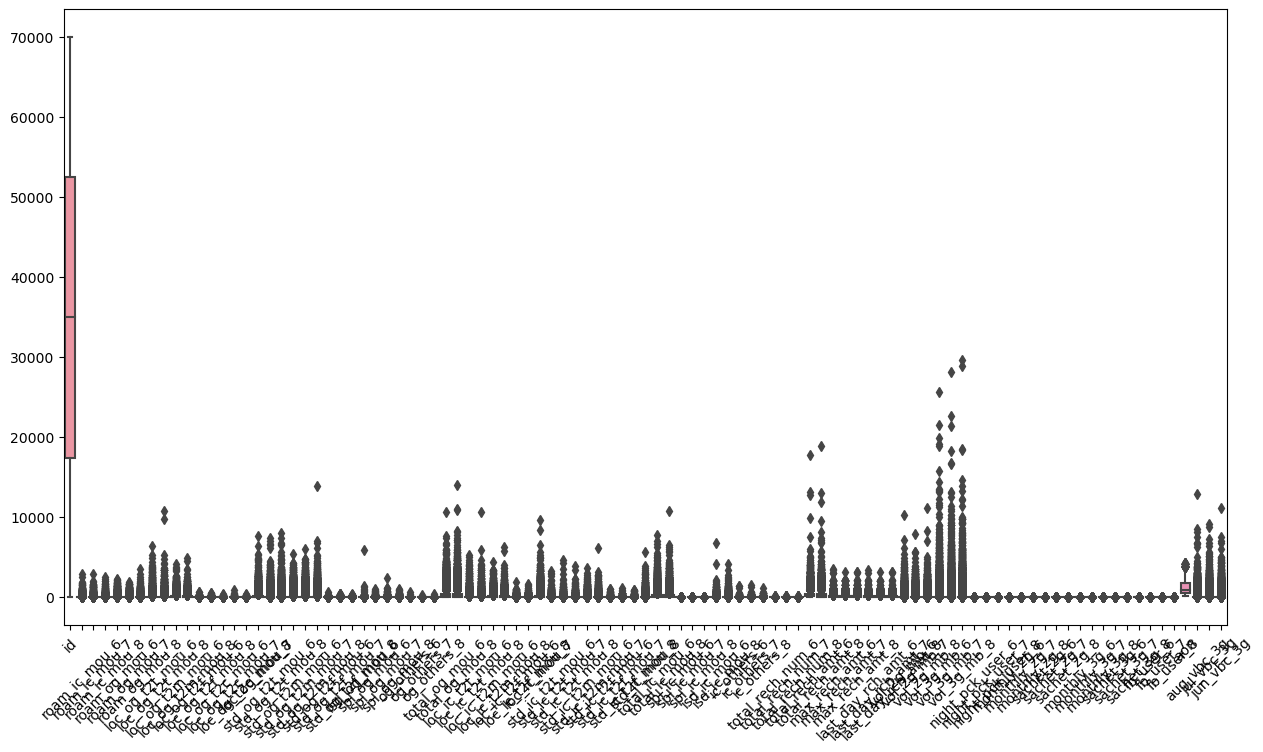

In [72]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_filtered)

### 3.9.1 Handling outliers

The box plots of these features show there a lot of outliers. These can be capped with k-sigma method.

In [73]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

<Axes: >

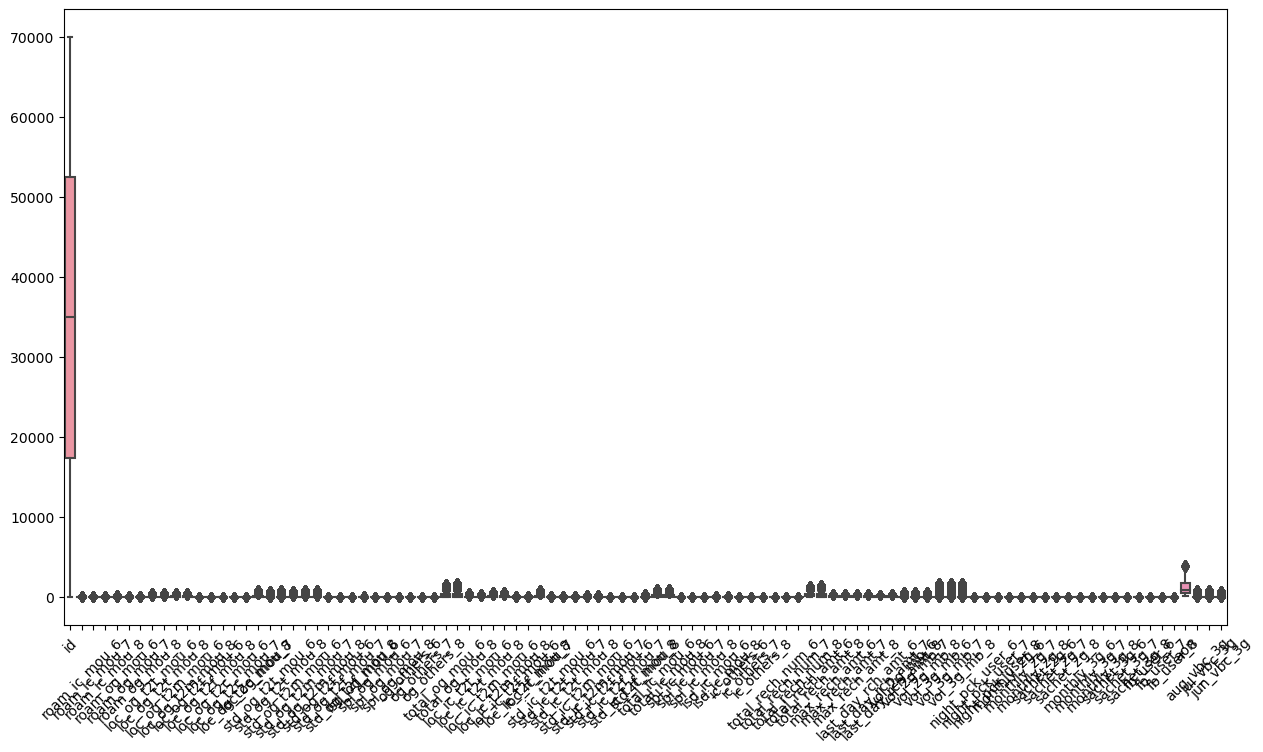

In [74]:
X_train_filtered1 = X_train_filtered.apply(cap_outliers, axis=0)

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_filtered1)

### 3.9.2 Feature scaling

Lets also scale the features by scaling them with Standard scaler (few other alternates are min-max scaling and Z-scaling).

In [75]:
scale = StandardScaler()
X_train_filtered2 = scale.fit_transform(X_train_filtered1)

In [76]:
X_test_filtered2 = scale.transform(X_test_filtered[new_vars])

In [77]:
X_test_filtered2

array([[ 1.01293704e+00, -2.57711061e-01, -2.21464271e-01, ...,
        -3.21093616e-01, -3.11992486e-01, -3.03787812e-01],
       [-7.63002530e-01, -2.57711061e-01, -2.21464271e-01, ...,
        -3.21093616e-01, -3.11992486e-01, -3.03787812e-01],
       [ 1.71342456e+00, -2.57711061e-01, -2.21464271e-01, ...,
        -3.21093616e-01, -3.11992486e-01, -3.03787812e-01],
       ...,
       [-1.36485421e+00, -2.57711061e-01, -2.21464271e-01, ...,
         1.94955375e+00, -3.11992486e-01, -3.03787812e-01],
       [ 1.69028592e+00, -2.57711061e-01,  1.69972868e-03, ...,
        -3.21093616e-01, -3.11992486e-01, -3.03787812e-01],
       [-1.08274087e+00, -2.57711061e-01, -2.21464271e-01, ...,
        -3.13123616e-01, -3.11992486e-01, -3.03787812e-01]])

<Axes: >

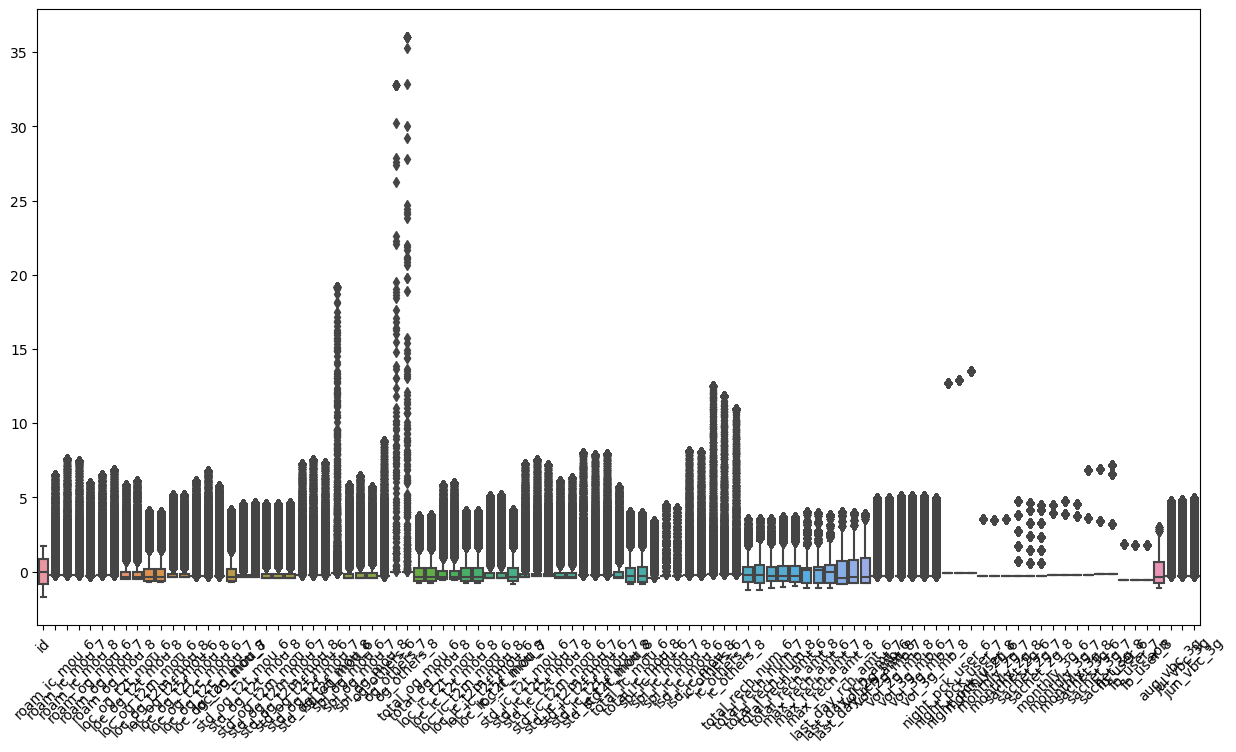

In [78]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = pd.DataFrame(X_train_filtered2, columns=new_vars))

You can perform feature transformations at this stage.

1. **Positively skewed:** Common transformations of this data include square root, cube root, and log.
2. **Negatively skewed:** Common transformations include square, cube root and logarithmic.

Please read the following link to understand how to perform feature scaling and preprocessing : https://scikit-learn.org/stable/modules/preprocessing.html

Lets also plot the correlations for each feature for bivariate analysis.

<Axes: >

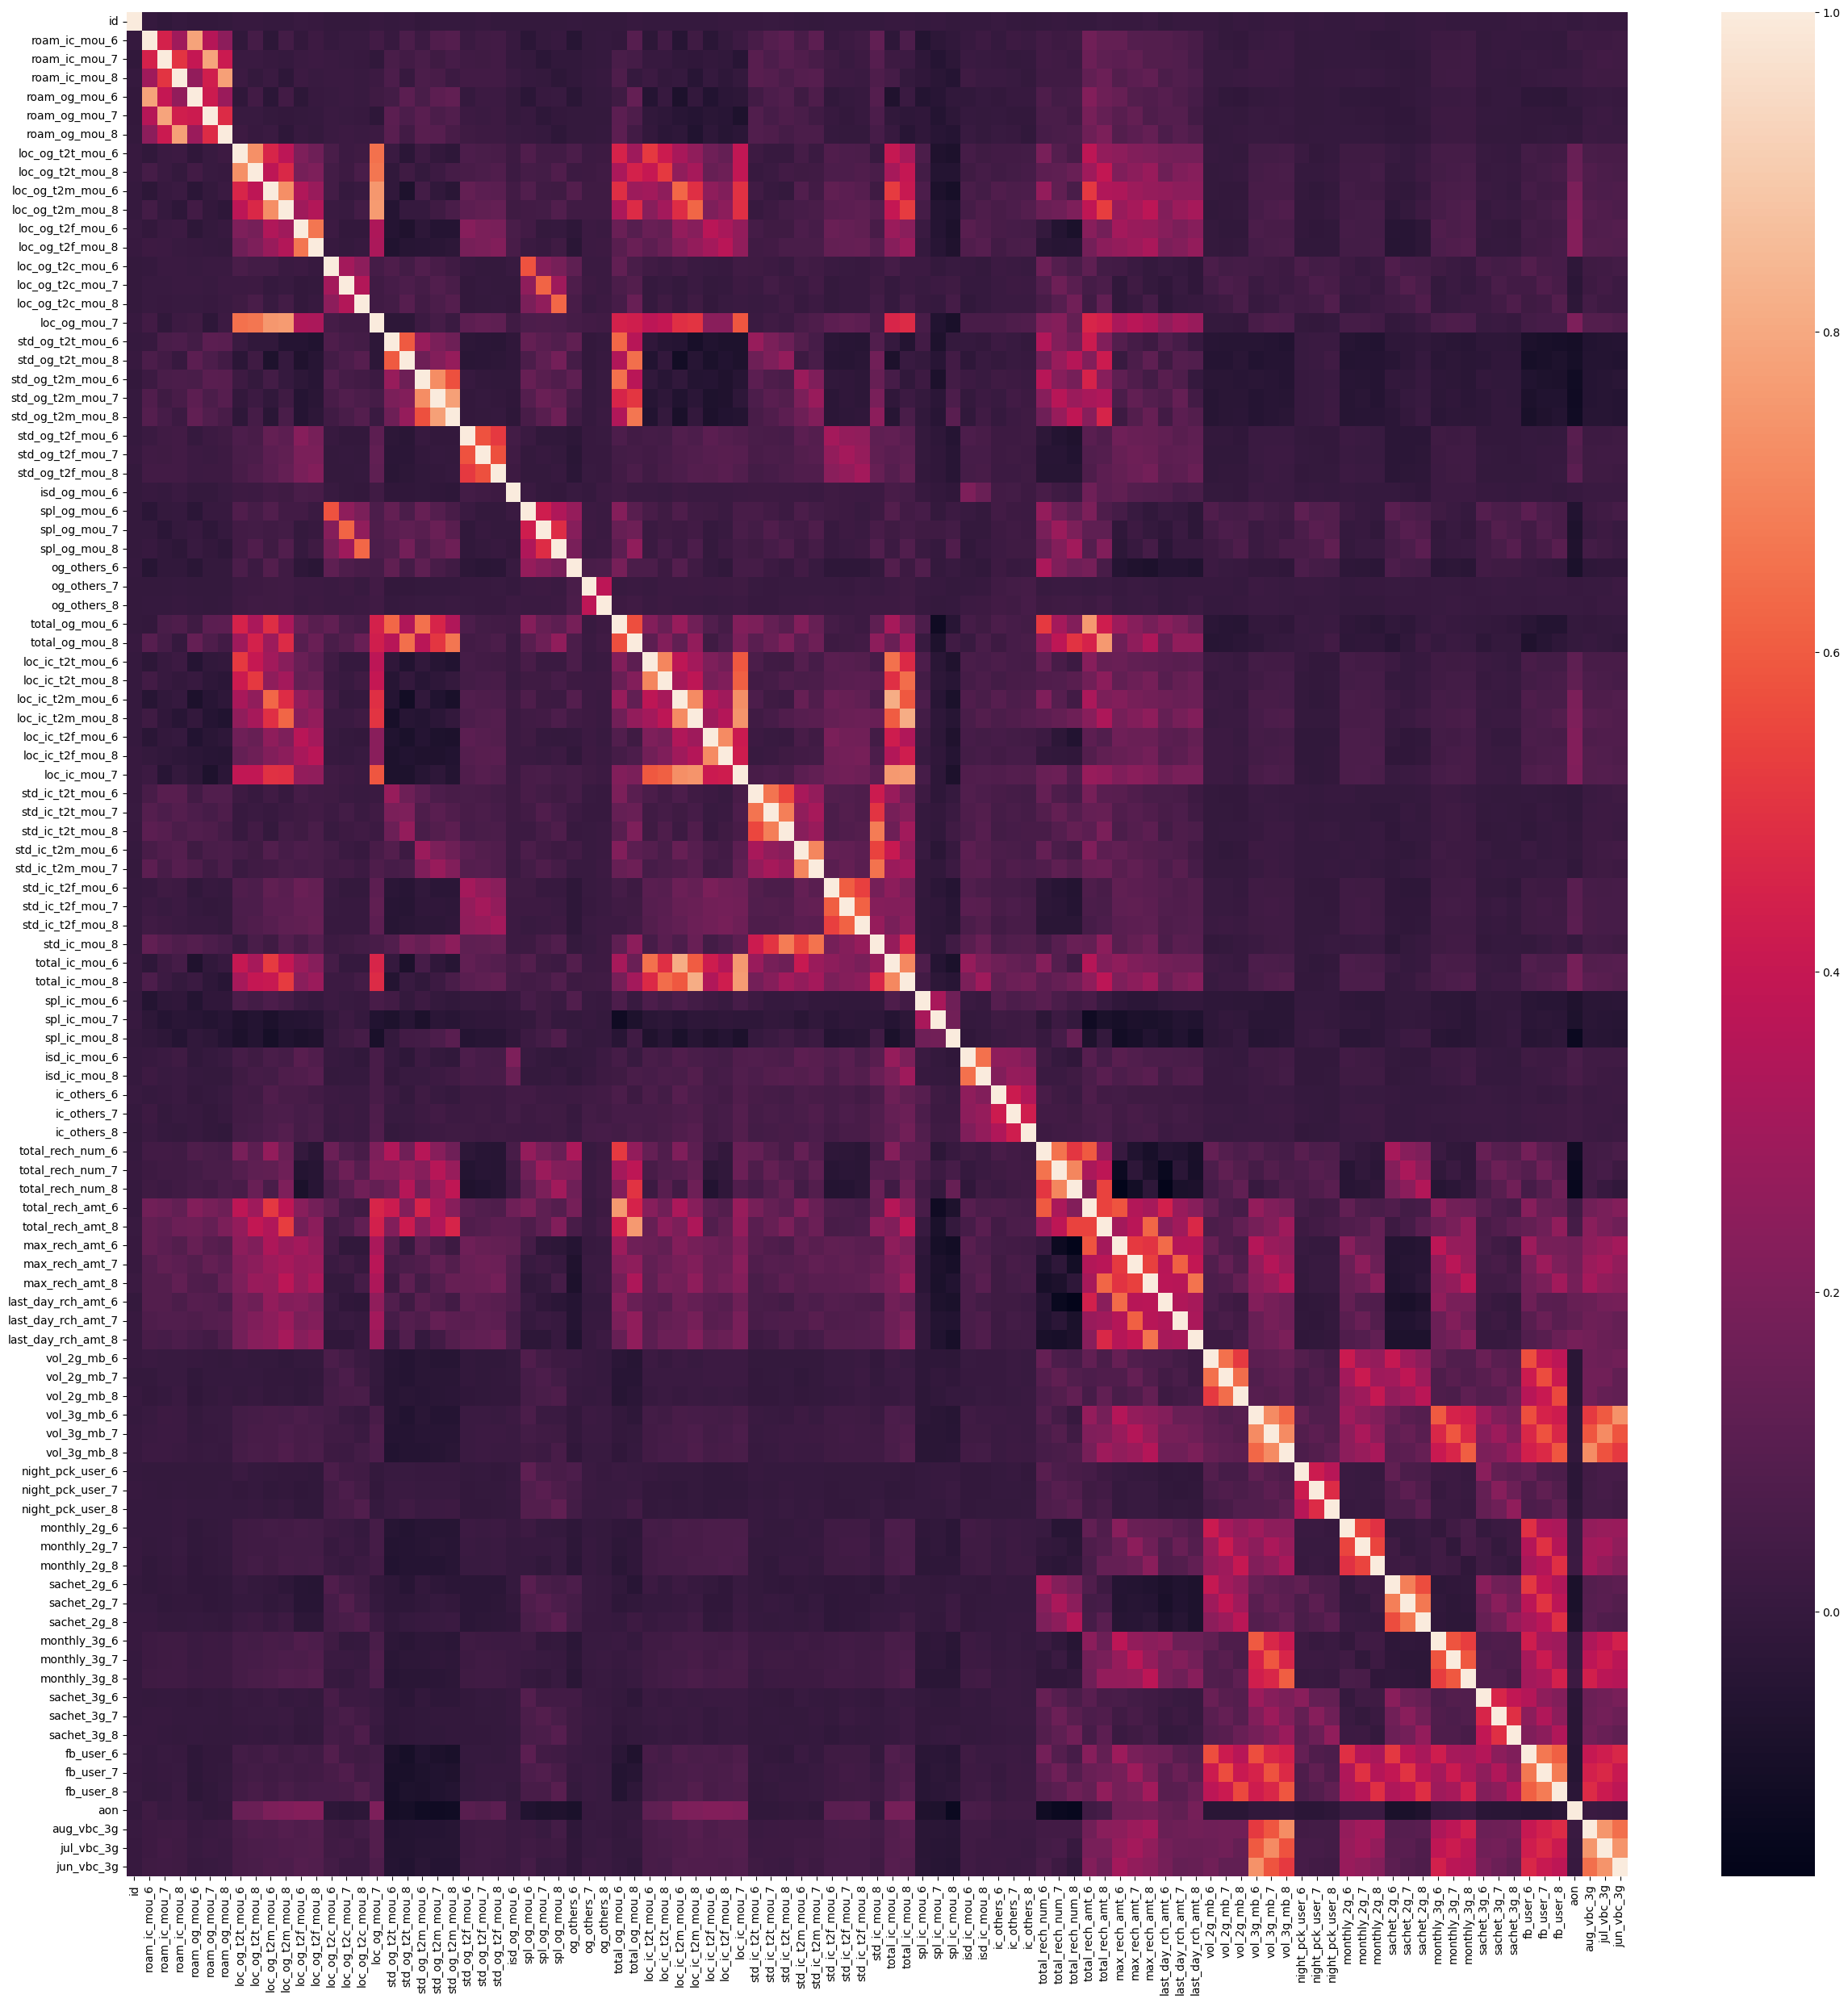

In [79]:
plt.figure(figsize=(30,30))
sns.heatmap(pd.DataFrame(X_train_filtered2, columns=new_vars).corr())

# 4. Feature engineering using Logistic Regression

Let's understand feature importances for raw features as well as components to decide top features for modelling.

In [80]:
X_train_filtered2

array([[ 2.66814988e-01, -2.57711061e-01, -2.21464271e-01, ...,
        -3.21093616e-01, -3.11992486e-01, -3.03787812e-01],
       [-3.38294493e-03,  1.43240687e+00, -2.21464271e-01, ...,
        -3.21093616e-01, -3.11992486e-01, -3.03787812e-01],
       [ 1.69745495e+00, -2.57711061e-01, -2.21464271e-01, ...,
        -3.21093616e-01, -3.11992486e-01, -3.03787812e-01],
       ...,
       [ 8.21005038e-01, -2.57711061e-01, -2.21464271e-01, ...,
        -3.21093616e-01, -3.11992486e-01, -3.03787812e-01],
       [ 1.07261296e+00, -2.57711061e-01, -2.21464271e-01, ...,
         3.77686199e-01, -5.49642094e-02, -3.03787812e-01],
       [-2.34818722e-01, -2.57711061e-01, -2.21464271e-01, ...,
         3.47182382e+00, -2.91789900e-01, -3.03787812e-01]])

### 4.1 Model using RFECV and Logistic Regression

Based on analysis of Model 1 for VIF, Summary results above we could drop columns that have high correlation

In [81]:
# X_train_fitlered2 is scaled. Since its anumpy array, lets create dataframe
X_train_scaled = pd.DataFrame(X_train_filtered2, columns=new_vars)
X_test_scaled = pd.DataFrame(X_test_filtered2, columns=new_vars)

In [82]:
X_train_scaled.head()

id  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0  0.266815      -0.257711      -0.221464      -0.223562      -0.280144   
1 -0.003383       1.432407      -0.221464      -0.223562       1.224951   
2  1.697455      -0.257711      -0.221464      -0.223562      -0.280144   
3  1.662203      -0.257711      -0.221464      -0.223562      -0.280144   
4  0.506606       0.929605      -0.221464      -0.223562       1.123956   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_8  \
0      -0.247692      -0.240394         -0.484220         -0.084463   
1      -0.247692      -0.240394         -0.488663         -0.381796   
2      -0.247692      -0.240394         -0.080888         -0.171680   
3       0.307622      -0.240394         -0.501864         -0.399900   
4      -0.247692      -0.240394         -0.495198         -0.490950   

   loc_og_t2m_mou_6  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  \
0         -0.678194  ...    -0.199027    -0.194776    -0.195228  -0.546921   
1         -0.649216  ...    -0.199027    -0.194776    -0.195228  -0.546921   
2          0.232279  ...    -0.199027    -0.194776    -0.195228  -0.546921   
3         -0.700955  ...    -0.199027    -0.194776    -0.195228  -0.546921   
4          1.112766  ...    -0.199027    -0.194776    -0.195228  -0.546921   

   fb_user_7  fb_user_8       aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0  -0.549502  -0.554474 -0.999960   -0.321094   -0.311992   -0.303788  
1  -0.549502  -0.554474 -0.585372   -0.321094   -0.311992   -0.303788  
2  -0.549502  -0.554474  0.254354   -0.321094   -0.311992   -0.303788  
3  -0.549502  -0.554474  0.238530   -0.321094   -0.311992   -0.303788  
4  -0.549502  -0.554474 -0.841720   -0.321094   -0.311992   -0.303788  

[5 rows x 99 columns]

In [83]:
X_train_scaled.shape

(48999, 99)

In [84]:
logistic_regression = LogisticRegression(max_iter=1000)

In [85]:
rfecv = RFECV(estimator=logistic_regression, n_jobs=-1, step=1, cv=5, scoring='accuracy')

In [86]:
rfecv.fit(X_train_filtered2, y_train)

RFECV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
      scoring='accuracy')

In [87]:
# Get the number of features selected by RFECV based on best cross-validated performance
optimal_features_rfecv = rfecv.n_features_

# Get the indices of the selected features
rfecv_support = rfecv.support_

# Get the names of the selected features (assuming you have feature names)
selected_features_rfecv = X_train_scaled.columns[rfecv_support]

print(f"RFECV Selected Features ({optimal_features_rfecv} features): {selected_features_rfecv}")

RFECV Selected Features (73 features): Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_8',
       'isd_og_mou_6', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_8', 'total_og_mou_6', 'total_og_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'std_ic_t2t_mou_7',
       'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'ic_others_8',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_8', 'max_rech_amt_

### 4.2 Analyse Performance

In [88]:
print_logistic_model_summary(X_train_scaled[selected_features_rfecv], y_train.values, X_test_scaled[selected_features_rfecv], y_test.values)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48925
Model Family:                Binomial   Df Model:                           73
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10159.
Date:                Tue, 11 Jun 2024   Deviance:                       20317.
Time:                        17:25:33   Pearson chi2:                 2.41e+07
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2100
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2942      0

Summary: We have very good accuracy score of 89% and Precision (ratio of correctly predicted positive observations to the total predicted positives) of 64% with just 32 columns

In [89]:
print_vif(X_train_scaled[selected_features_rfecv])

            Features    VIF
23    total_og_mou_8  19.17
22    total_og_mou_6  13.15
36    total_ic_mou_8  13.02
44  total_rech_amt_6   8.33
45  total_rech_amt_8   8.19
..               ...    ...
38      spl_ic_mou_7   1.17
39      spl_ic_mou_8   1.12
16      isd_og_mou_6   1.11
40       ic_others_8   1.08
21       og_others_8   1.01

[73 rows x 2 columns]


VIF Interpretation: There's no single threshold for a "high" VIF. But, inthe industry, following are observed as a general guideline:
* **VIF < 5**: Likely not a major concern for multicollinearity.
* **5 <= VIF < 10**: Might indicate some multicollinearity, but further investigation is needed.
* **VIF >= 10**: Suggests strong multicollinearity, and these features are likely candidates for elimination.

In [90]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [91]:
def fit_logistic_regression_and_filter_features(X, y, family=sm.families.Binomial()):
    while True:
        # Build and fit the logistic regression model
        logit_model = sm.GLM(y, X, family=family)
        result = logit_model.fit()
        
        # Output the summary of the model
        print(result.summary())

        # Calculate VIF
        vif_df = calculate_vif(X)
        print("VIF DataFrame:\n", vif_df)
        
        # Identify features to drop based on VIF and p-value
        high_vif_features = vif_df[vif_df['VIF'] > 5]['Feature']
        high_p_value_features = result.pvalues[result.pvalues > 0.05].index
        
        features_to_drop = set(high_vif_features).union(set(high_p_value_features))
        
        # If no features need to be dropped, exit loop
        if len(features_to_drop) == 0:
            break
        
        # Drop features
        X = X.drop(columns=features_to_drop)
    
    return result, X

In [92]:
# Apply the function to your training data
X_train_rfe_new = X_train_scaled[selected_features_rfecv]
X_train_ols = sm.add_constant(X_train_rfe_new)
final_model, final_XTrain = fit_logistic_regression_and_filter_features(X_train_ols, y_train.values.reshape(-1,1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48925
Model Family:                Binomial   Df Model:                           73
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10159.
Date:                Tue, 11 Jun 2024   Deviance:                       20317.
Time:                        17:26:26   Pearson chi2:                 2.41e+07
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2100
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2942      0

In [93]:
# Remove the constant term from the final feature variables
final_XTrain = final_XTrain.drop(columns='const', errors='ignore')
# Print the summary of the final model
print("Final Model Summary:")
print(final_model.summary())

# Get the selected final features
selected_final_features = final_XTrain.columns
print("\nSelected Final Features:")
print(selected_final_features)

# Identify top features based on the absolute values of the coefficients
coefficients = final_model.params
top_features = coefficients.abs().sort_values(ascending=False)
top_features = top_features[top_features.index != 'const']  # Exclude the constant term if present

print("\nTop Features Relevant for Explaining Variance in the Model:")
print(top_features)

Final Model Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48964
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10602.
Date:                Tue, 11 Jun 2024   Deviance:                       21203.
Time:                        17:26:41   Pearson chi2:                 5.02e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1956
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const          

In [94]:
X_test_rfe_new = X_test_scaled[selected_final_features]
X_test_ols = sm.add_constant(X_test_rfe_new)
evaluate_model_performance(final_model, X_test_ols, y_test.values)


------------------------------------------

AUC-ROC: 0.8841
Precision: 0.6409
Sensitivity (Recall): 0.2897
F1 Score: 0.3990

------------------------------------------



{'AUC-ROC': 0.884109888167121,
 'Precision': 0.6408730158730159,
 'Recall': 0.2896860986547085,
 'F1 Score': 0.3990117356392835}

Following are the top features in ascending order:
<pre>
Top Features Relevant for Explaining Variance in the Model:
loc_og_t2m_mou_8      1.050167
loc_ic_t2t_mou_8      0.873348
spl_ic_mou_8          0.843547
total_rech_num_8      0.816625
loc_ic_t2f_mou_8      0.637720
last_day_rch_amt_8    0.566569
std_ic_mou_8          0.473019
aon                   0.368319

### 4.3 Prepare and submit submission file using Logistic Regression

In [95]:
# Transform the training and test sets
X_train_rfecv = X_train_scaled[selected_features_rfecv]
X_test_rfecv = X_train_scaled[selected_features_rfecv]

# Create a new pipeline with the selected features and trained model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Handle missing values
    ('scaler', StandardScaler()),                # Scale the features
    ('pca',PCA(n_components=45)),
    ('logisticregression', LogisticRegression(max_iter=1000, tol=0.001))  # Logistic Regression model
])

pipeline.fit(X_train_rfecv, y_train)

Pipeline(steps=[('imputer', SimpleImputer(fill_value=0, strategy='constant')),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=45)),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, tol=0.001))])

In [96]:
predict_and_save(pipeline, selected_features_rfecv, "logistic_regression", output_path)

id  churn_probability
0      69999                  0
1      70000                  0
2      70001                  0
3      70002                  0
4      70003                  0
...      ...                ...
29995  99994                  0
29996  99995                  0
29997  99996                  0
29998  99997                  0
29999  99998                  0

[30000 rows x 2 columns]

# 5. Model Building using Decision Tree


In [97]:
X.head()

id  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0   0           0.00            0.0            0.0           0.00   
1   1           0.00            0.0            0.0           0.00   
2   2           0.00            0.0            0.0           0.00   
3   3           0.00            0.0            0.0           0.00   
4   4          53.64            0.0            0.0          15.73   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_8  \
0            0.0           0.00              2.23              0.28   
1            0.0           0.00              0.00              0.00   
2            0.0           0.00              0.53              0.00   
3            0.0           1.63              6.99              0.00   
4            0.0           0.00             10.16              6.13   

   loc_og_t2m_mou_6  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  \
0              5.29  ...            0            0            0        0.0   
1              0.00  ...            0            0            0        0.0   
2             24.11  ...            0            0            0        0.0   
3             37.91  ...            0            0            0        0.0   
4             36.74  ...            0            1            0        1.0   

   fb_user_7  fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        0.0        0.0  1958         0.0         0.0         0.0  
1        1.0        0.0   710         0.0         0.0         0.0  
2        0.0        0.0   882         0.0         0.0         0.0  
3        0.0        0.0   982         0.0         0.0         0.0  
4        1.0        1.0   647         0.0         0.0         0.0  

[5 rows x 99 columns]

In [98]:
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_imputed = imputer.fit_transform(X)
pca = PCA(n_components = 20)
X_train_pca = pca.fit_transform(X_imputed)

In [99]:

X_train, X_test, y_train, y_test = train_test_split(X_train_pca, y, train_size=0.7, random_state=46)

In [100]:
initial_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
initial_dt.fit(X_train, y_train)

# Train accuracy
y_train_pred = initial_dt.predict(X_train)
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
print(f'Train data accuracy: {train_accuracy:.2f}')

# Test predictions
y_test_pred = initial_dt.predict(X_test)

# Print the classification report on test data
test_classification_report = metrics.classification_report(y_test, y_test_pred)
print("Classification report on test data:")
print(test_classification_report)

Train data accuracy: 0.94
Classification report on test data:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     18770
           1       0.55      0.41      0.47      2230

    accuracy                           0.90     21000
   macro avg       0.74      0.69      0.71     21000
weighted avg       0.89      0.90      0.90     21000



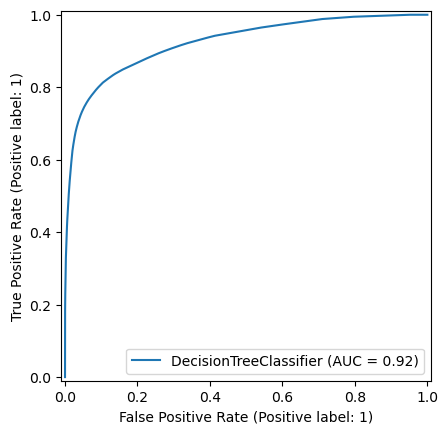

In [101]:
# Plot ROC curve
from sklearn.metrics import RocCurveDisplay 
RocCurveDisplay.from_estimator(initial_dt, X_train, y_train, drop_intermediate=False)
plt.show()

## 5.1 Hyperparameter tuning

In [102]:
# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters and their values for tuning
param_grid = {
    'max_depth': [3, 5, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [103]:
# Best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f'Best parameters: {best_params}')
print(f'Best estimator: {best_estimator}')
print(f"Best Score: {grid_search.best_score_}")

# Evaluate the best model on the test set
y_test_pred = best_estimator.predict(X_test)

# Print the classification report

print("Classification report on test data:")
print(metrics.classification_report(y_test, y_test_pred))

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10,
                       random_state=42)
Best Score: 0.9093859348413311
Classification report on test data:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     18770
           1       0.56      0.40      0.47      2230

    accuracy                           0.90     21000
   macro avg       0.75      0.68      0.71     21000
weighted avg       0.89      0.90      0.90     21000



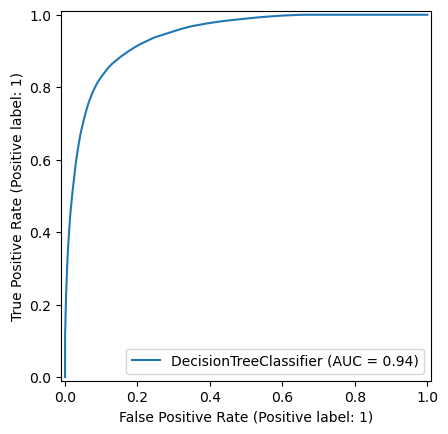

In [104]:
RocCurveDisplay.from_estimator(best_estimator, X_train, y_train, drop_intermediate=False)
plt.show()

# 6. Model Building using Random Forest

In [105]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their values for tuning
param_grid = {
    'n_estimators': [10, 15, 20],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [106]:
# Fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 15, 20]},
             scoring='accuracy')

In [107]:
# Best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f'Best parameters: {best_params}')
print(f'Best estimator: {best_estimator}')
print(f"Best Score: {grid_search.best_score_}")

# Evaluate the best model on the test set
y_test_pred = best_estimator.predict(X_test)

# Print the classification report
print("Classification report on test data:")
print(metrics.classification_report(y_test, y_test_pred))

Best parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 20}
Best estimator: RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=20, random_state=42)
Best Score: 0.9203045104560857
Classification report on test data:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     18770
           1       0.67      0.34      0.45      2230

    accuracy                           0.91     21000
   macro avg       0.80      0.66      0.70     21000
weighted avg       0.90      0.91      0.90     21000



# 7. AdaBoost Classifier

In [108]:
# Initialize the AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the model
ada.fit(X_train, y_train)

# Make predictions
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

In [109]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, ada.predict_proba(X_test)[:, 1])

print(f'Train accuracy: {train_accuracy:.2f}')
print(f'Test accuracy: {test_accuracy:.2f}')
print(f'Test AUC: {test_auc:.2f}')
print("Classification report on test data:")
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy: 0.91
Test accuracy: 0.90
Test AUC: 0.87
Classification report on test data:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     18770
           1       0.59      0.22      0.32      2230

    accuracy                           0.90     21000
   macro avg       0.75      0.60      0.64     21000
weighted avg       0.88      0.90      0.88     21000



In [110]:
# Create a shallow tree as weak learner
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

# Fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# Test error
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.8938095238095238

In [111]:
# Adaboost with shallow tree as base estimator

# Define the number of trees to be used or estimators
estimators = list(range(1, 150, 10))

# Loop through the estimators
adaboost_scores = []
for num_est in estimators:
    adaboost = AdaBoostClassifier(n_estimators = num_est, random_state=25)
    
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    adaboost_scores.append(score)

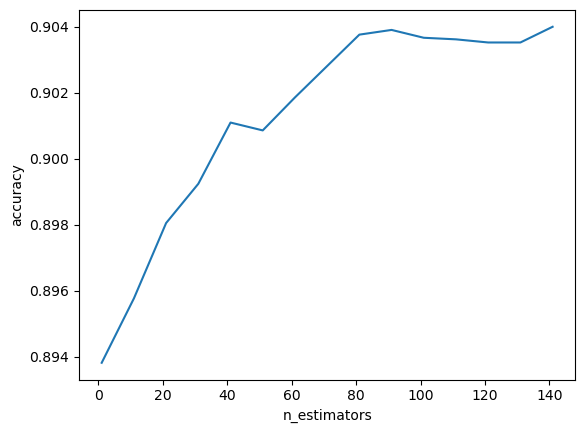

In [112]:
# Plot the scores corrosponding to number of estimators to find the best possible number of estimator
plt.plot(estimators, adaboost_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

In [113]:
# Initialize the base estimator (shallow tree)
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# Initialize the AdaBoostClassifier with the base estimator
ada = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [114]:
# Fit the model
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                                           random_state=42),
                                          random_state=42),
             n_jobs=-1, param_grid={'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [115]:
# Best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f'Best parameters: {best_params}')
print(f'Best estimator: {best_estimator}')

# Evaluate the best model on the test set
y_test_pred = best_estimator.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, best_estimator.predict_proba(X_test)[:, 1])

print(f'Test accuracy: {test_accuracy:.2f}')
print(f'Test AUC: {test_auc:.2f}')

# Print the classification report on the test data
print("Classification report on test data:")
print(metrics.classification_report(y_test, y_test_pred))

Best parameters: {'n_estimators': 200}
Best estimator: AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   n_estimators=200, random_state=42)
Test accuracy: 0.90
Test AUC: 0.88
Classification report on test data:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     18770
           1       0.60      0.26      0.36      2230

    accuracy                           0.90     21000
   macro avg       0.76      0.62      0.66     21000
weighted avg       0.88      0.90      0.89     21000



# 8.  Final model using best parameters of Random Forest Classifier

In [116]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Handle missing values
    ('scaler', StandardScaler()),  # Step 1: Scaling the features
    ('pca', PCA(n_components=20)),  # PCA for dimensionality reduction
    ('classifier', RandomForestClassifier(
        bootstrap=False,
        max_depth=20,
        min_samples_leaf=2,
        min_samples_split=10,
        n_estimators=20,
        random_state=42
    ))
])

# Fit the pipeline on the training data
pipeline.fit(X, y)


Pipeline(steps=[('imputer', SimpleImputer(fill_value=0, strategy='constant')),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=20)),
                ('classifier',
                 RandomForestClassifier(bootstrap=False, max_depth=20,
                                        min_samples_leaf=2,
                                        min_samples_split=10, n_estimators=20,
                                        random_state=42))])

In [117]:
predict_and_save(pipeline, X.columns, "Random_Forest", output_path)

id  churn_probability
0      69999                  0
1      70000                  0
2      70001                  0
3      70002                  0
4      70003                  0
...      ...                ...
29995  99994                  0
29996  99995                  0
29997  99996                  0
29998  99997                  0
29999  99998                  0

[30000 rows x 2 columns]

# 9. Conclusion

The following are the Test data accuracy scores obtained for variaous algorithms

- Logistic Regression - 89
- PCA with Decision tree classifier - 90
- Decision tree with hyperparameter accuracy - 91
- RandomForest accuracy - 92
- Adaboost Classifier - 90

Random Forest provides the best fit model

Following are the important variables that are strong predicted for churn:


Top Features Relevant for Explaining Variance in the Model:

- **loc_og_t2m_mou_8** 
- **loc_ic_t2t_mou_8**
- **spl_ic_mou_8**
- **total_rech_num_8**
- **loc_ic_t2f_mou_8**
- **last_day_rch_amt_8**
- **std_ic_mou_8**
- **aon**